# Ghosts beams reference configurations
This notebook shows the refrence beam configurations for data taking to get the need set of ghosts.

In [1]:
%load_ext autoreload
%autoreload 


In [2]:
import timeit
import copy
import concurrent.futures 
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import batoid

from ghosts import plotter
from ghosts import simulator
from ghosts import tweak_optics
from ghosts import beam
from ghosts import geom


from ghosts.analysis import compute_ghost_separations, reduce_ghosts
from ghosts.analysis import match_ghosts, compute_reduced_distance, compute_2d_reduced_distance, find_nearest_ghost
from ghosts.analysis import make_data_frame

from ghosts.beam_configs import BEAM_CONFIG_0, BEAM_CONFIG_1, BEAM_CONFIG_3
from ghosts.geom_configs import GEOM_CONFIG_0

from ghosts.camera import build_camera, show_camera

## Build a basic telescope for debugging

In [3]:
# A few numbers, sepcific to 600 nm
beam_power_600nm = 13  # 13 Watt for the full spot according to measurements done in Grenoble
ccd_reflectivity_600nm = 0.141338
ccd_qe_600nm = 0.843274
lens_reflectivity_600nm = 0.004  # 0.4% code by Julien Bolmont
filter_reflectivity_600nm = 0.038  # r band filter documentation stated transmission is 96.2%

# CCOB like geometry, i.e. lenses but no filter
telescope = batoid.Optic.fromYaml("../data/LSST_CCOB_r.yaml")

# Make refractive interfaces partially reflective
# Call on current telescope, smart coating is [lens, filter, camera]
tweak_optics.make_optics_reflective(telescope, coating='smart',
                                    r_frac=[lens_reflectivity_600nm, filter_reflectivity_600nm, ccd_reflectivity_600nm])

0

In [4]:
# Ray trace one config for debugging
trace_full, r_forward, r_reverse, rays = simulator.run_simulation(telescope, beam_config=BEAM_CONFIG_1)
simulation = [trace_full, r_forward, r_reverse, rays]

# reduce ghosts
spots_data, _spots = reduce_ghosts(r_forward)
spots_data_frame = make_data_frame(spots_data)
gh_sep = compute_ghost_separations(spots_data_frame)

## Define a function to fully visualize a beam configuration and ghosts

In [5]:
def beam_test(telescope, beam_config):
    # Run simulation with standard beam config
    trace_full, r_forward, r_reverse, rays = simulator.run_simulation(telescope, beam_config=beam_config)
    simulation = [trace_full, r_forward, r_reverse, rays]
    # Check setup
    #plotter.plot_setup(telescope, simulation)

    # camera and ghosts visualization
    spots_data, _spots = reduce_ghosts(r_forward)
    spots_data_frame = make_data_frame(spots_data)
    _fig, _ax = plotter.plot_full_camera_and_spots(r_forward, spots_data_frame, log_scale=True)
    camera = build_camera()
    show_camera(_ax[1], camera)

    # pixel signal
    plt.rcParams["figure.figsize"] = [15, 6]
    fig, ax = plt.subplots(1, 2)
    axs = ax.flatten()
    spots_data_frame["pixel_signal_log"] = np.log10(spots_data_frame["pixel_signal"])
    #spots_data_frame.plot.bar("name", "pixel_signal_log")
    names = [f'{s}' for s in list(spots_data_frame["name"])]
    ax[0].bar(names, spots_data_frame["pixel_signal_log"])
    ax[0].set_xlabel("Ghost")
    ax[0].set_label("log10(pixel_signal)")
    ax[0].axhline(5, color="red")
    ax[0].tick_params(axis='x', labelrotation = 90)
    ax[0].axhline(1, color="black")
    ax[0].axhline(1.5, color="cyan")
    ax[0].set_title("Photons per pixel in each ghost spot\nfor a 100 nW beam of diameter 2.5 mm\nat 600 nm for a 1 s exposure")
    
    # ghosts separation
    gh_sep = compute_ghost_separations(spots_data_frame)
    ax[1].hist(gh_sep['distance']*1000, bins=20, range=[0., 10])
    ax[1].set_xlabel("Distance to ghosts (mm)")
    ax[1].set_label("Number")
    
    # zoom on ghosts
    plotter.plot_zoom_on_ghosts(r_forward)

## Start building beam configurations chosen by hand

In [6]:
reference_beam_configurations = []

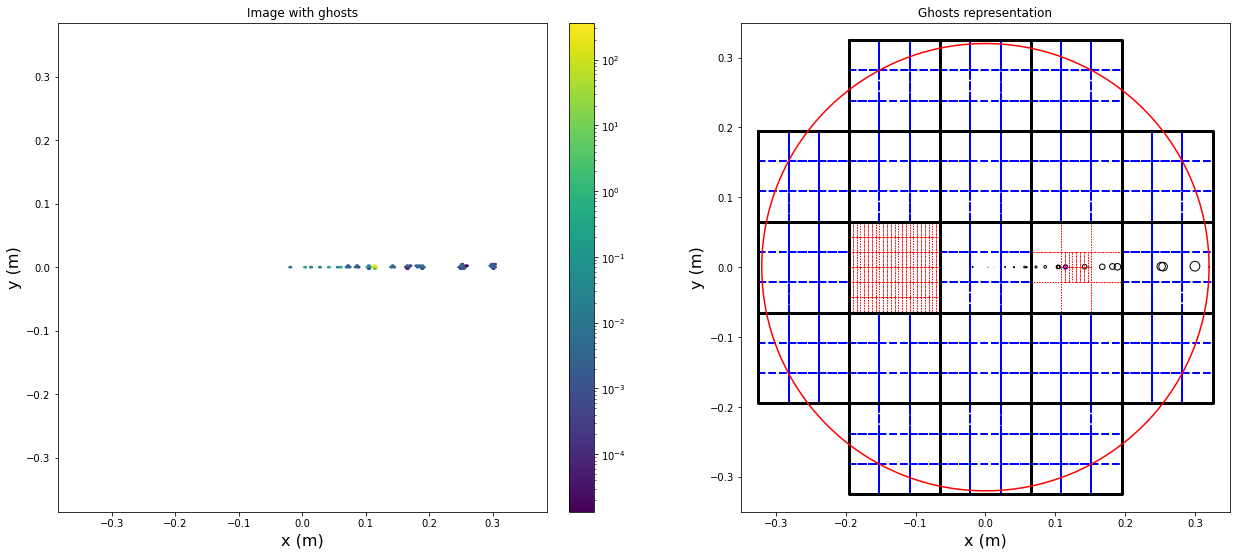

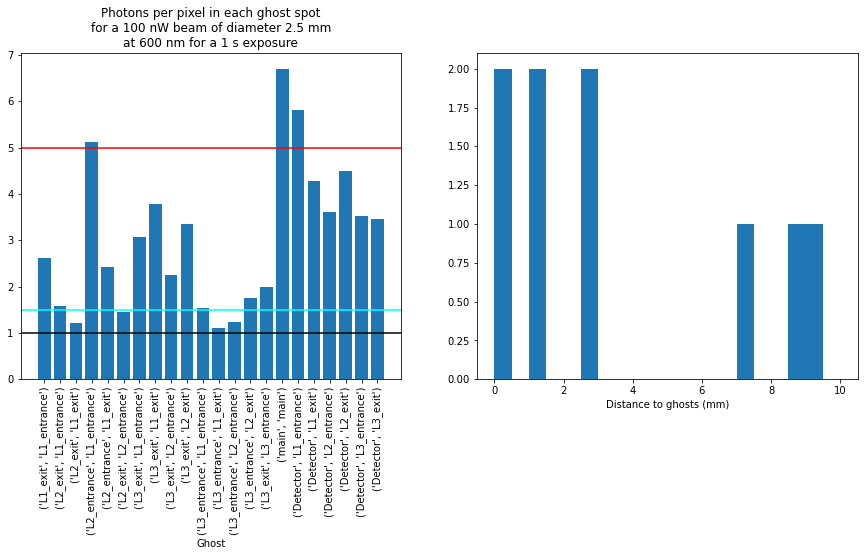

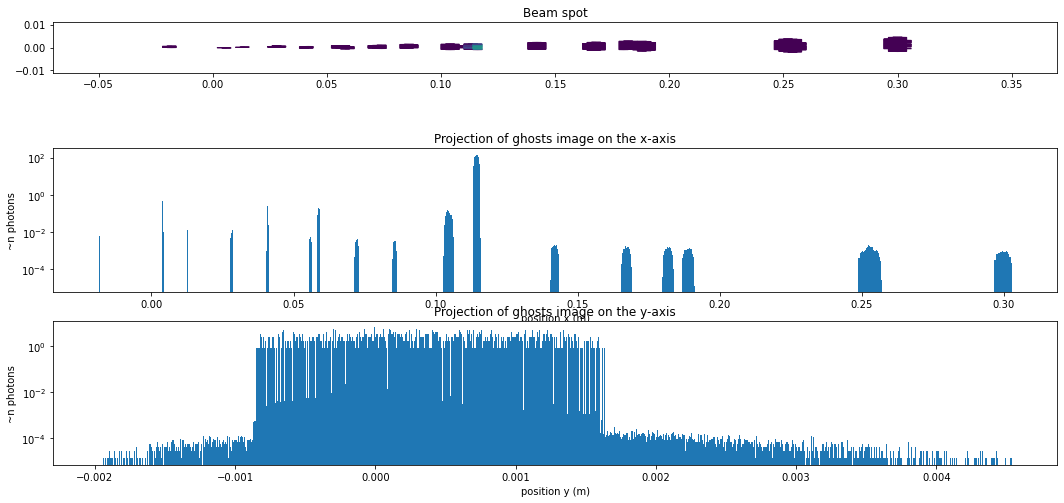

In [7]:
# Test beam - 1 degree - X
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999000
new_beam['x_offset'] = 0.1
new_beam['y_offset'] = 0.
new_beam['x_euler'] = 0
new_beam['y_euler'] = 0.5
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

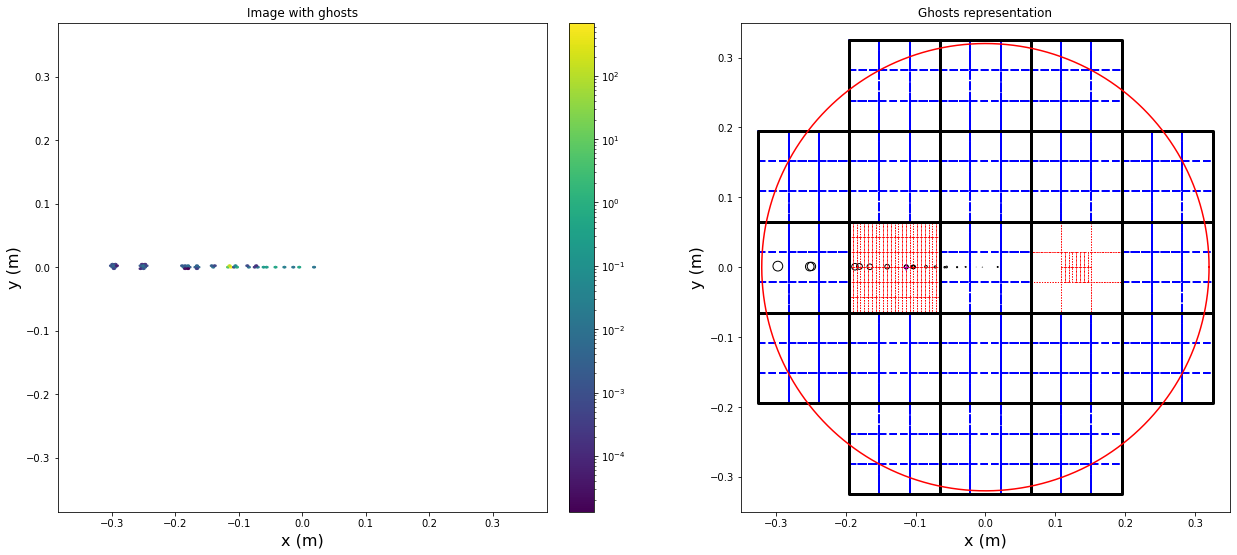

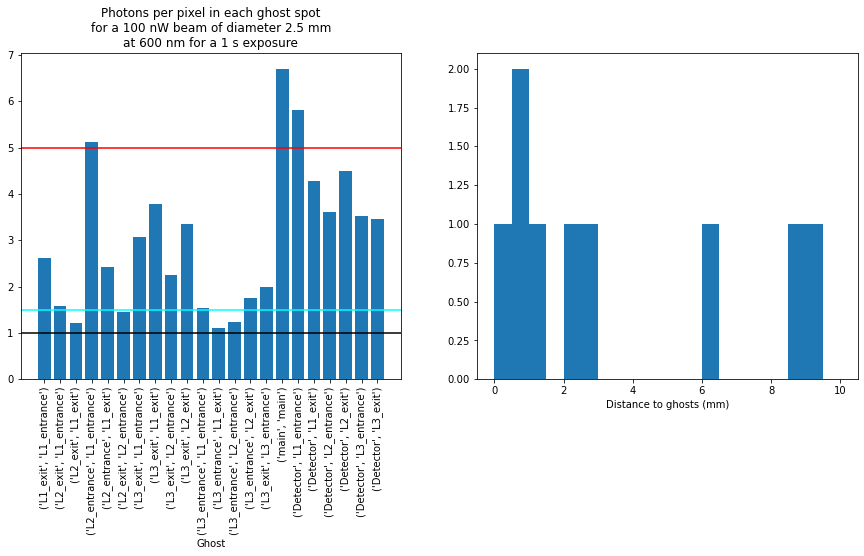

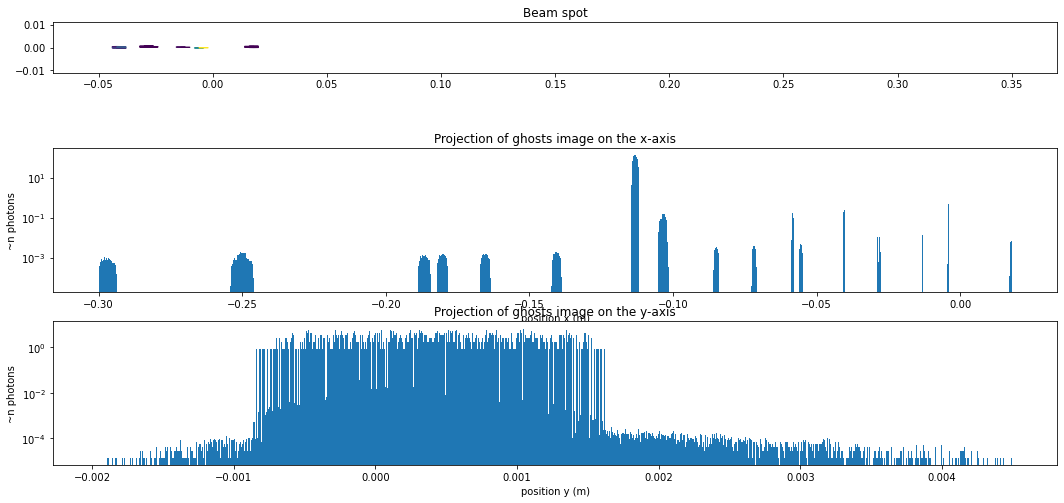

In [8]:
# Test beam - 1 degree - X
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999001
new_beam['x_offset'] = -0.1
new_beam['y_offset'] = 0.
new_beam['x_euler'] = 0
new_beam['y_euler'] = -0.5
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

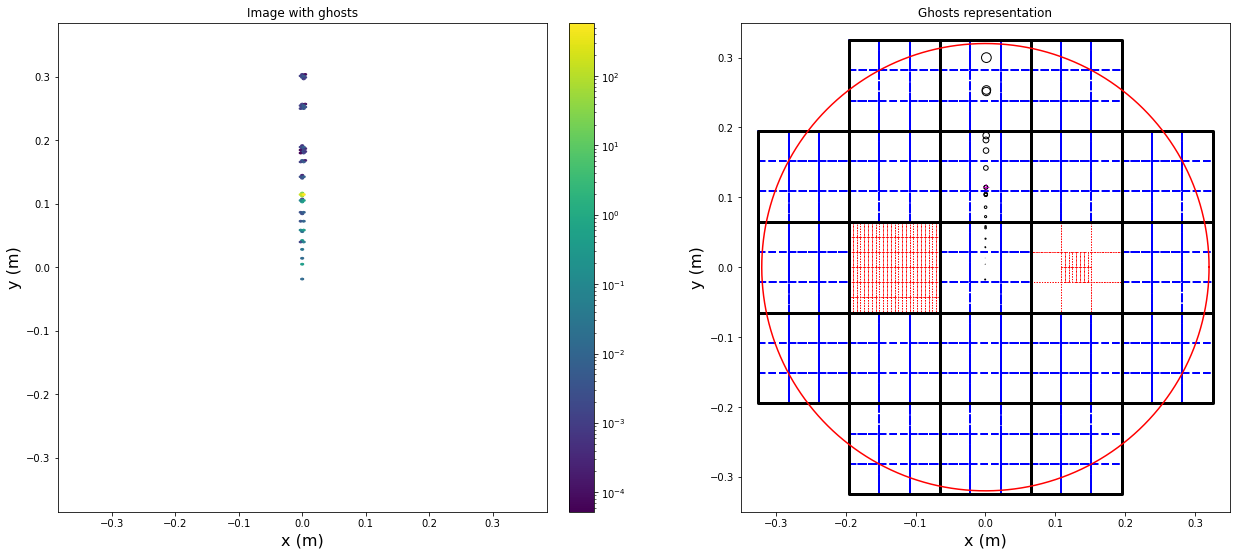

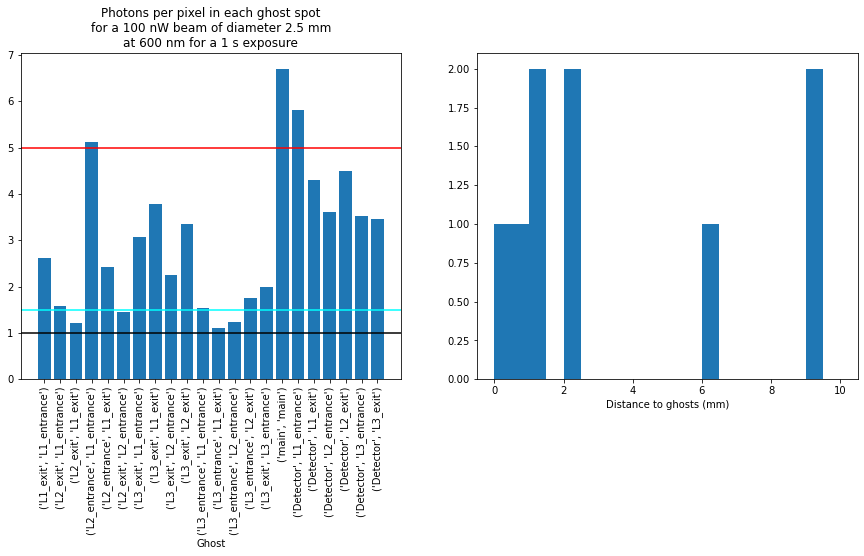

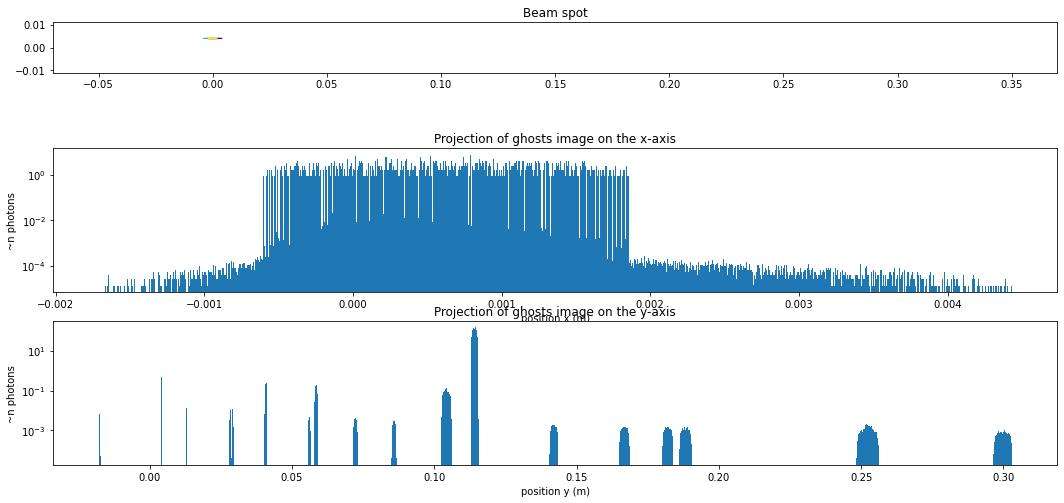

In [9]:
# Test beam - 1 degree - X
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999002
new_beam['x_offset'] = 0.
new_beam['y_offset'] = 0.1
new_beam['x_euler'] = -0.5
new_beam['y_euler'] = 0
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

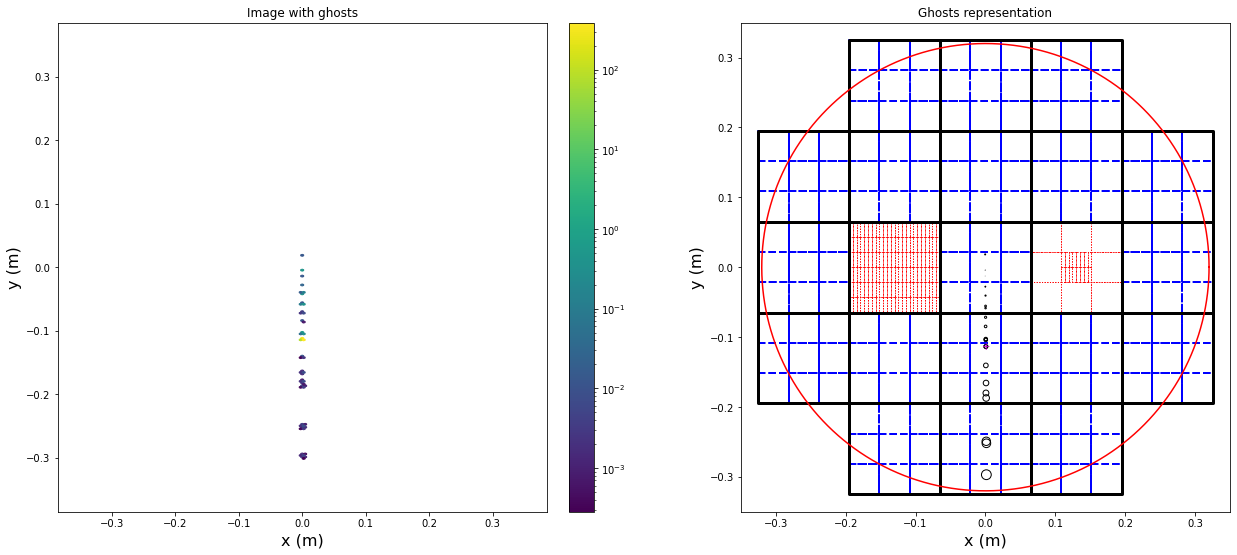

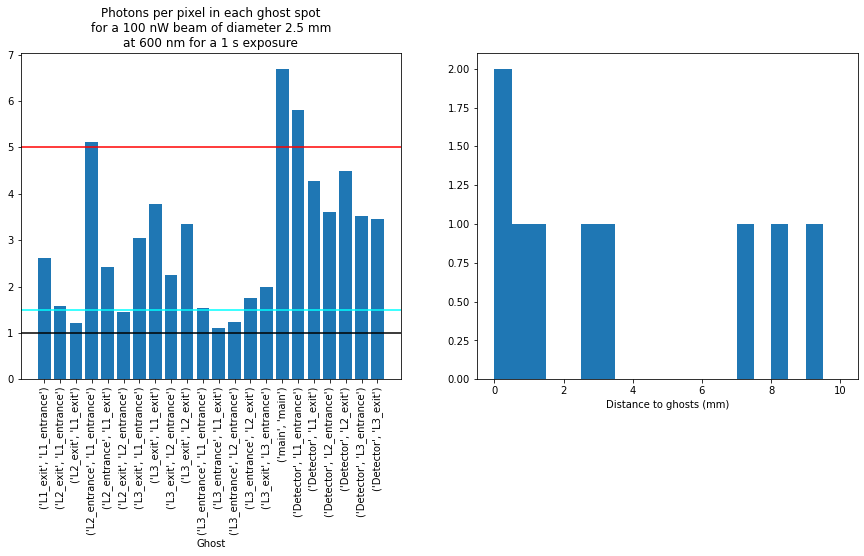

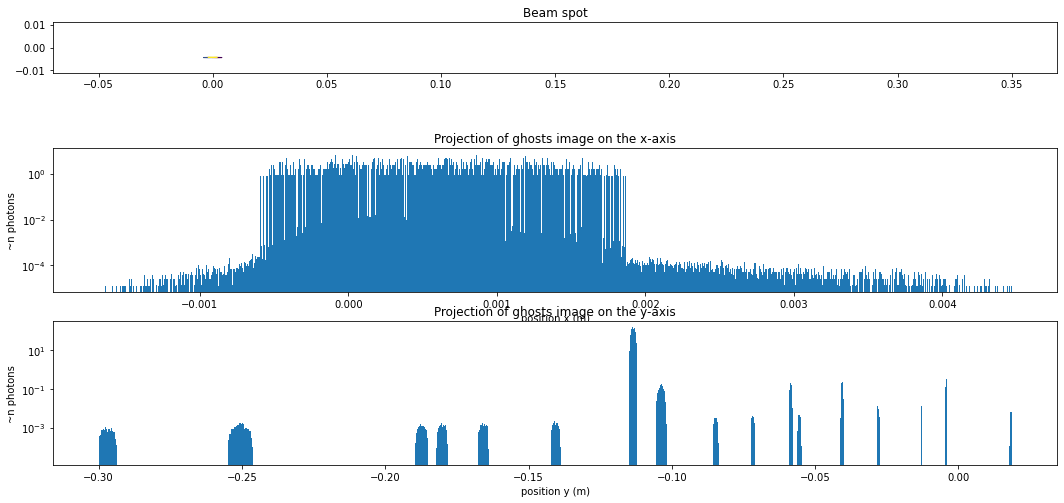

In [10]:
# Test beam - 1 degree - X
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999003
new_beam['x_offset'] = 0.
new_beam['y_offset'] = -0.1
new_beam['x_euler'] = 0.5
new_beam['y_euler'] = 0
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

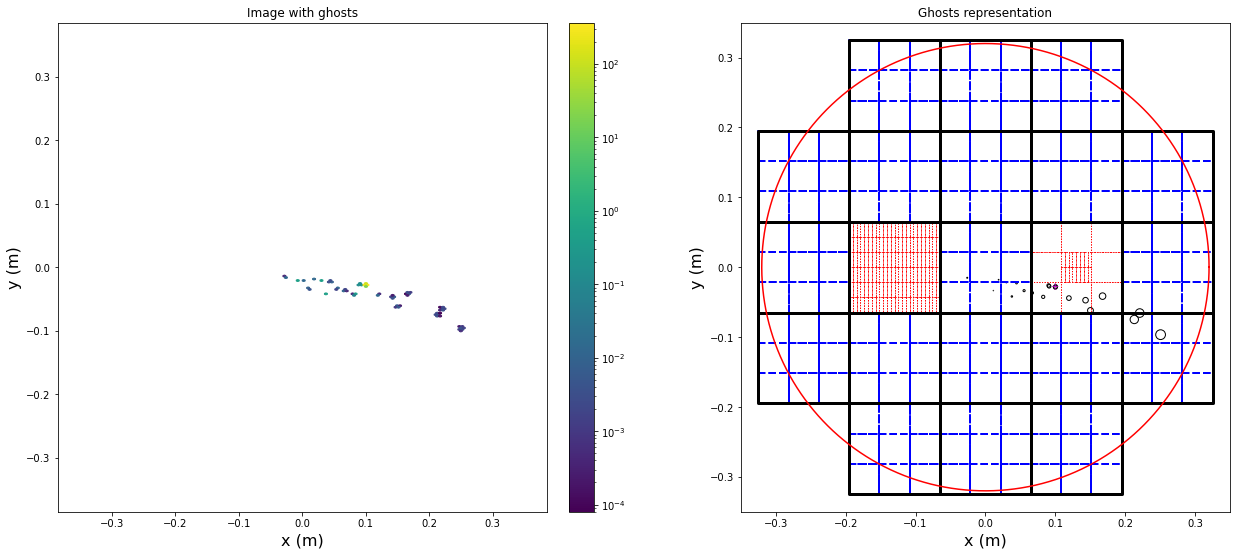

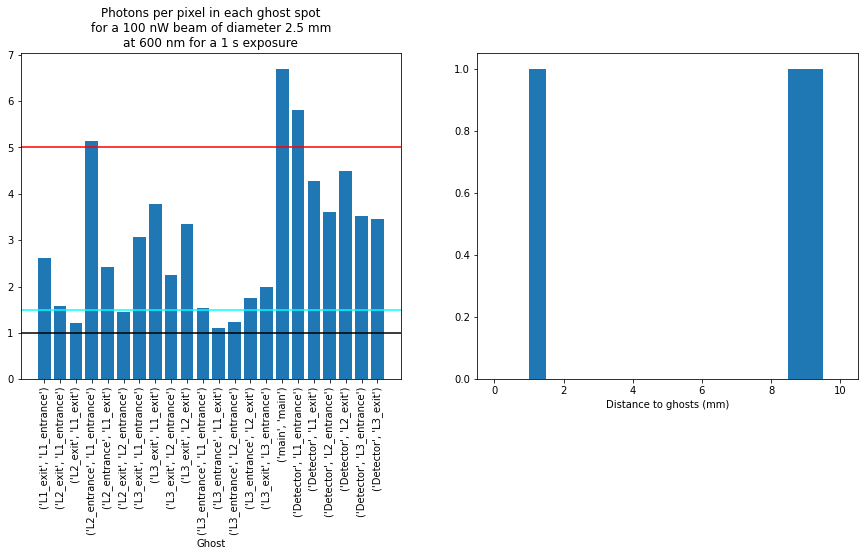

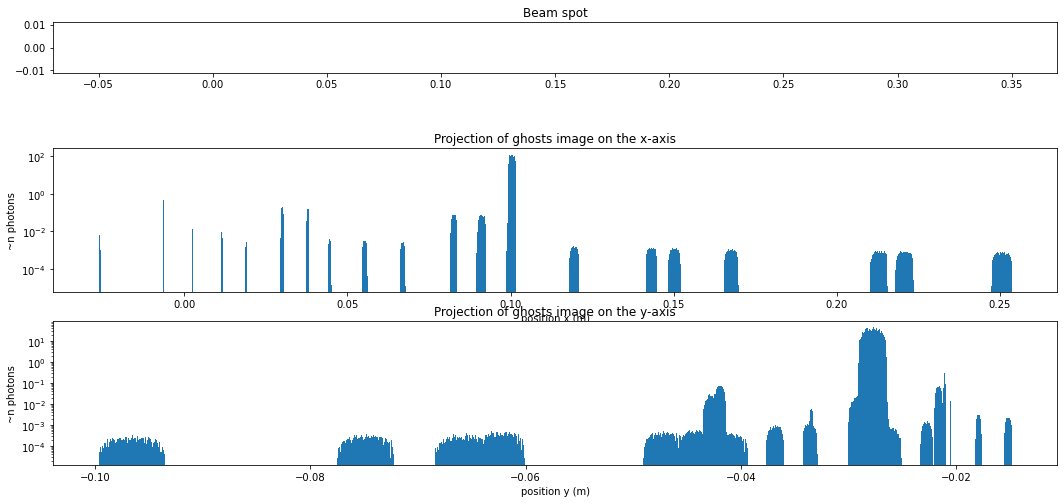

In [11]:
# Test beam - 1 degree Y - X
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999010
new_beam['x_offset'] = 0.1
new_beam['y_offset'] = 0.
new_beam['x_euler'] = 1
new_beam['y_euler'] = 0
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

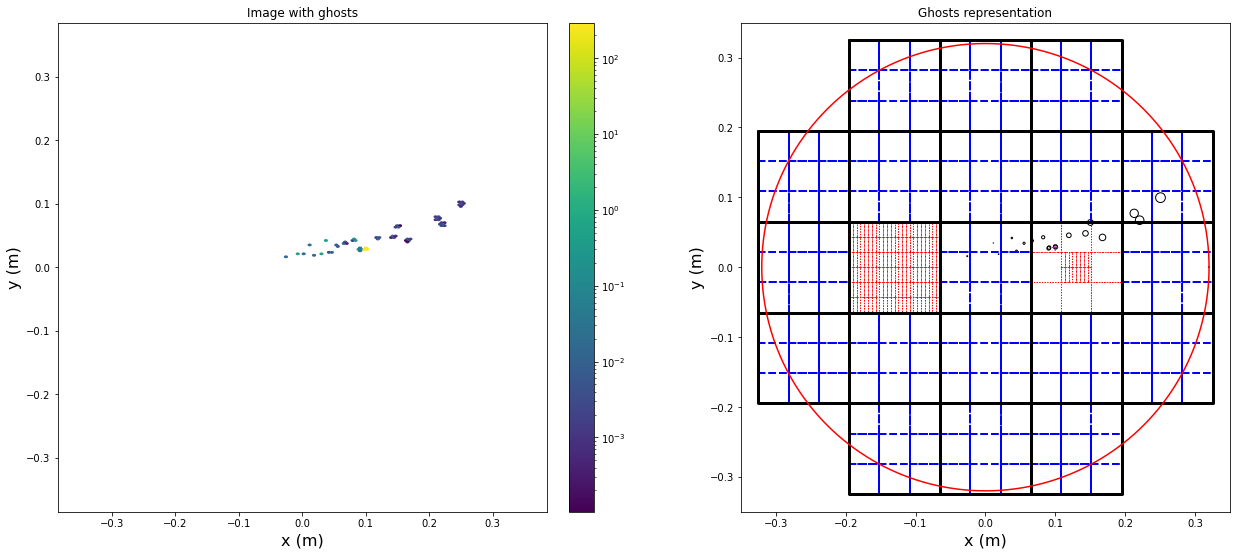

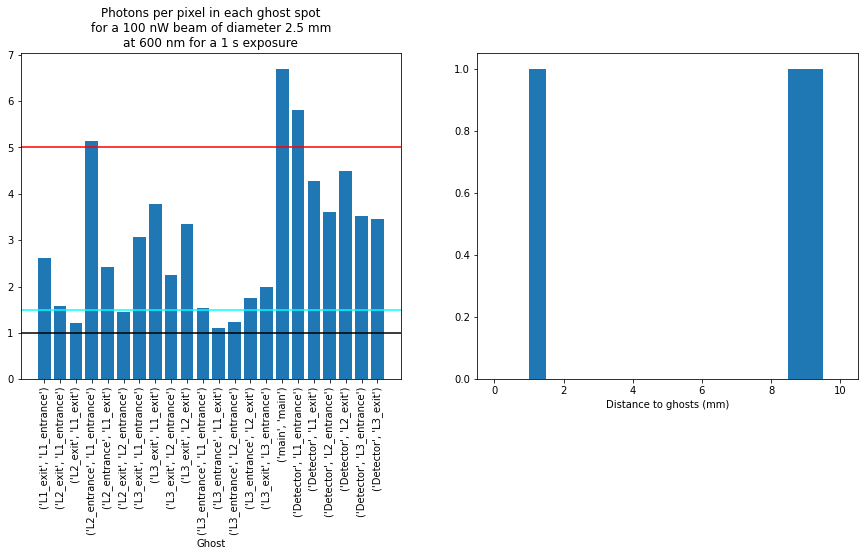

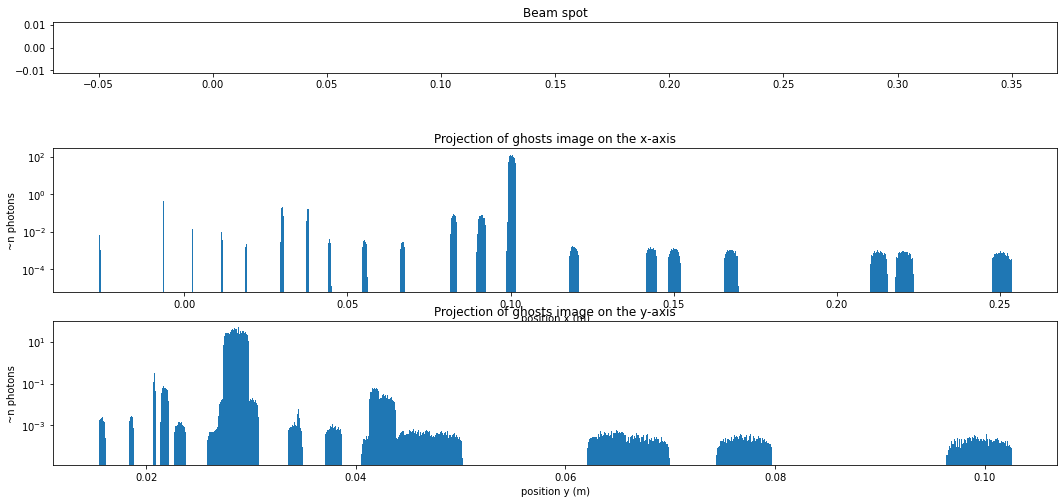

In [12]:
# Test beam - 1 degree Y - X
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999011
new_beam['x_offset'] = 0.1
new_beam['y_offset'] = 0.
new_beam['x_euler'] = -1
new_beam['y_euler'] = 0
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

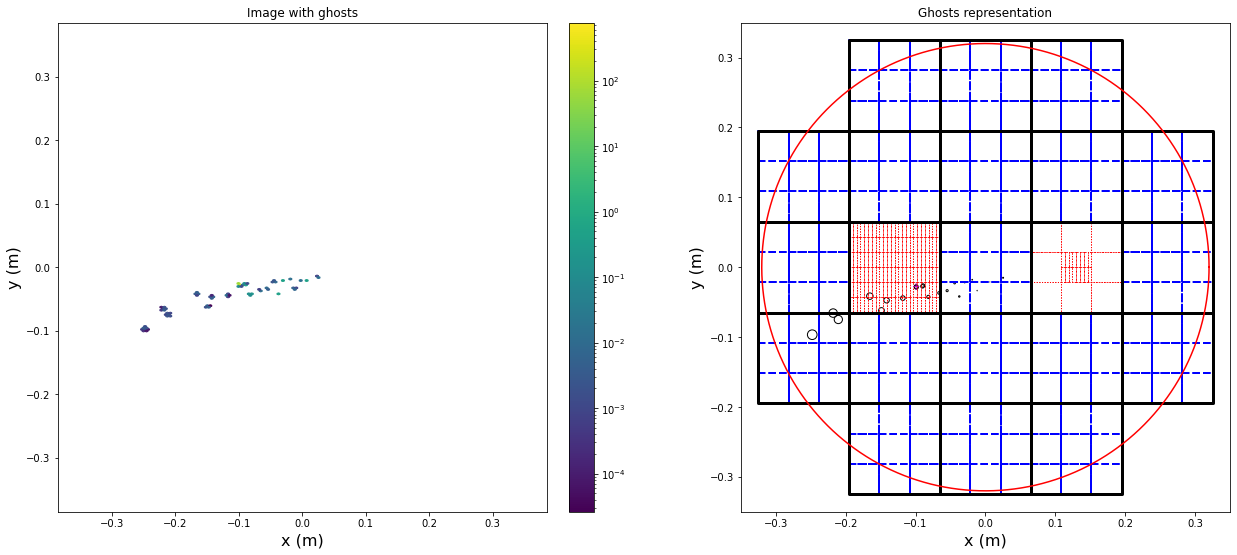

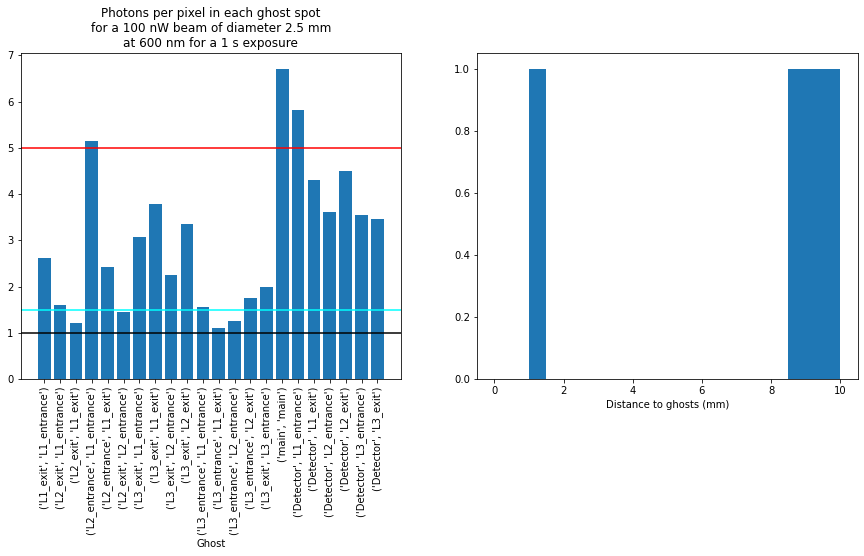

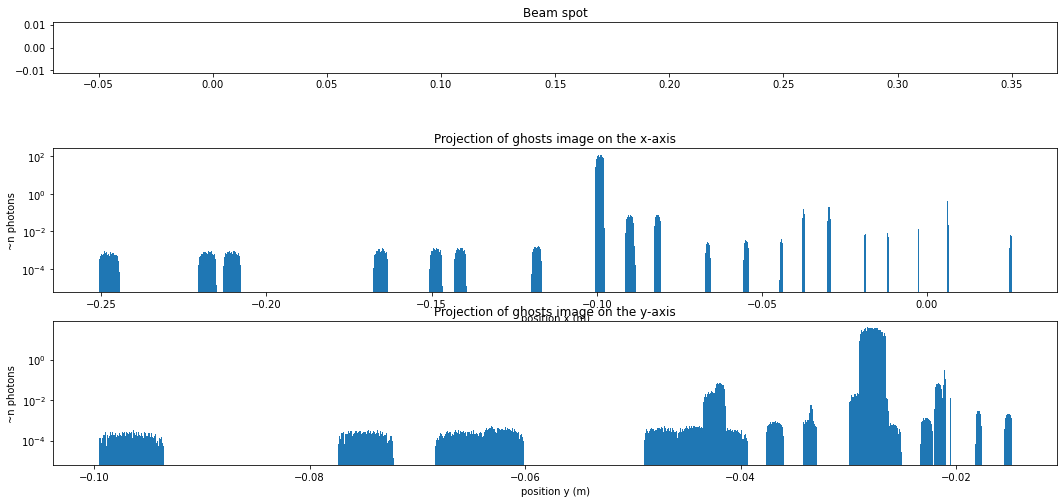

In [13]:
# Test beam - 1 degree Y - X
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999012
new_beam['x_offset'] = -0.1
new_beam['y_offset'] = 0.
new_beam['x_euler'] = 1
new_beam['y_euler'] = 0
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

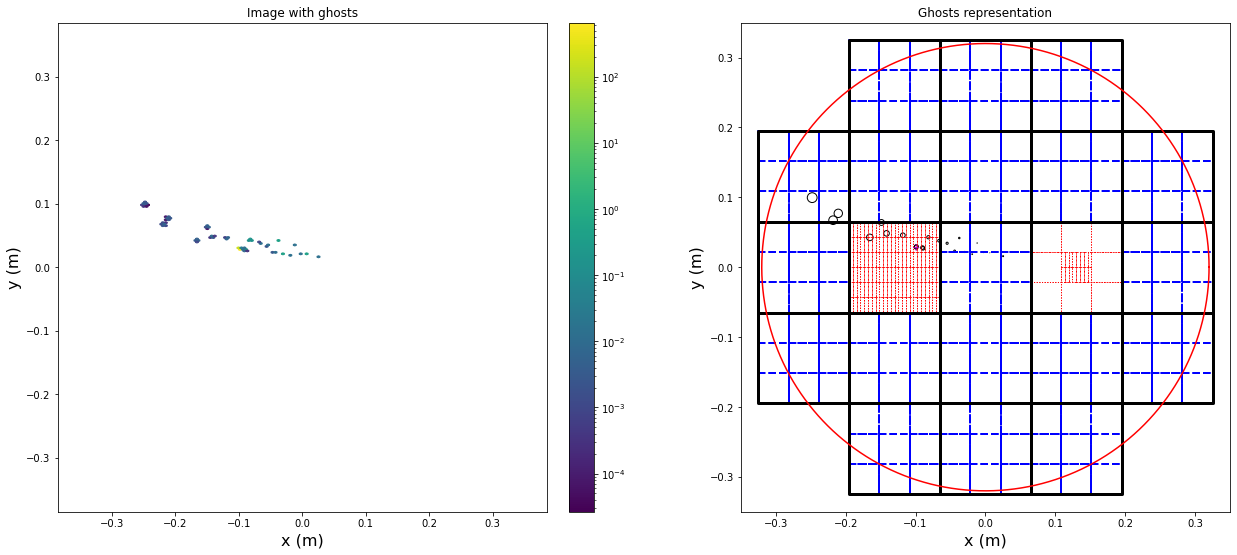

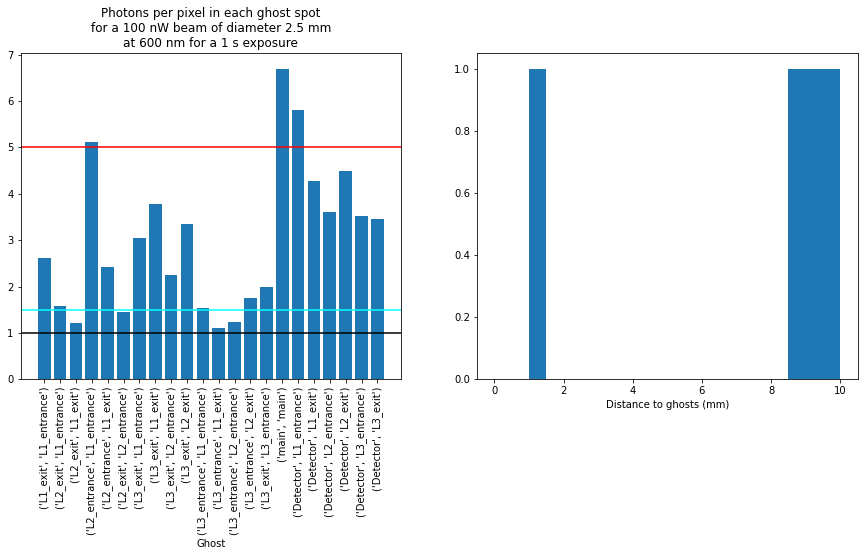

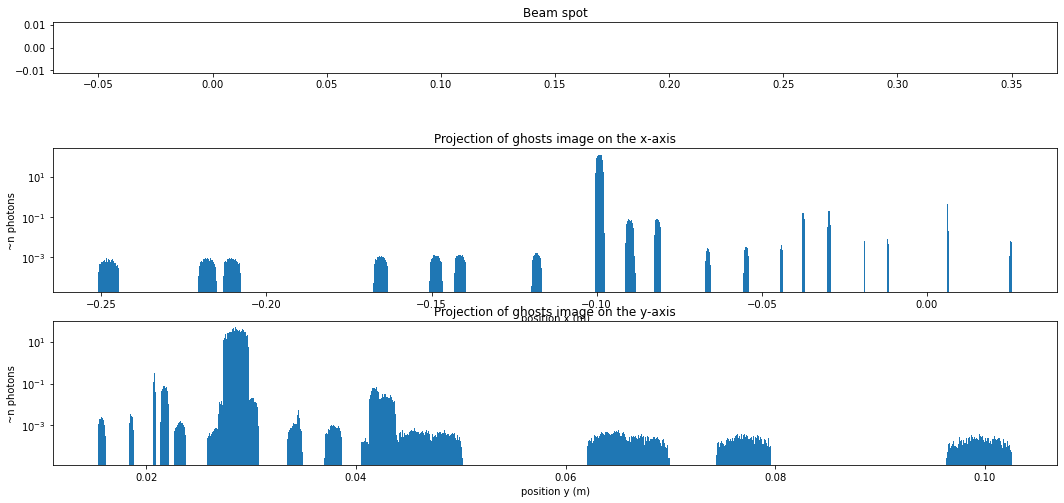

In [14]:
# Test beam - 1 degree Y - X
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999013
new_beam['x_offset'] = -0.1
new_beam['y_offset'] = 0.
new_beam['x_euler'] = -1
new_beam['y_euler'] = 0
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

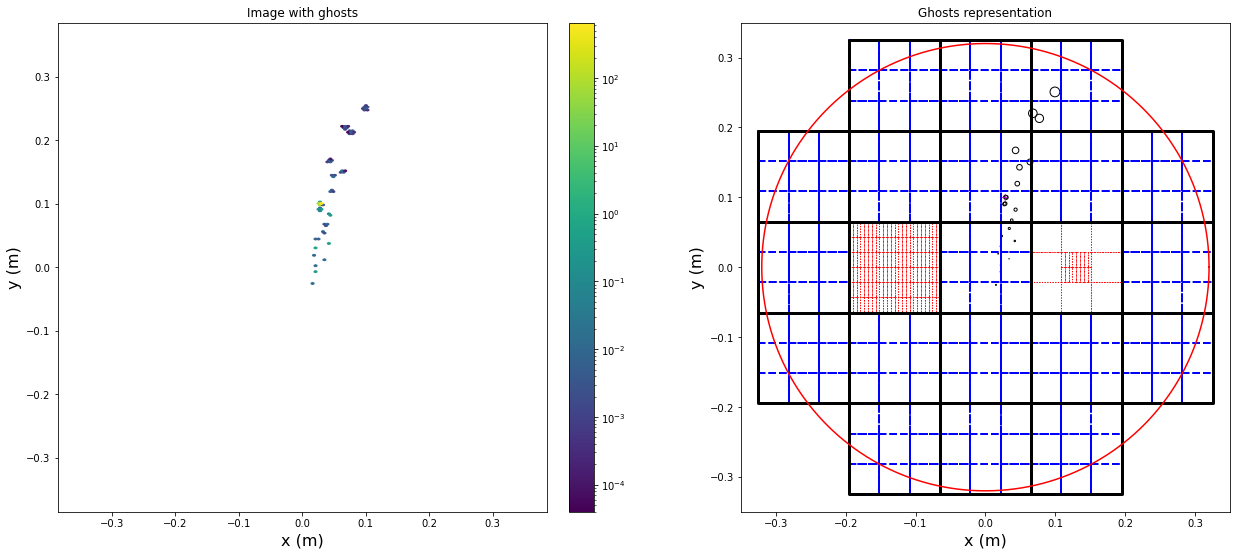

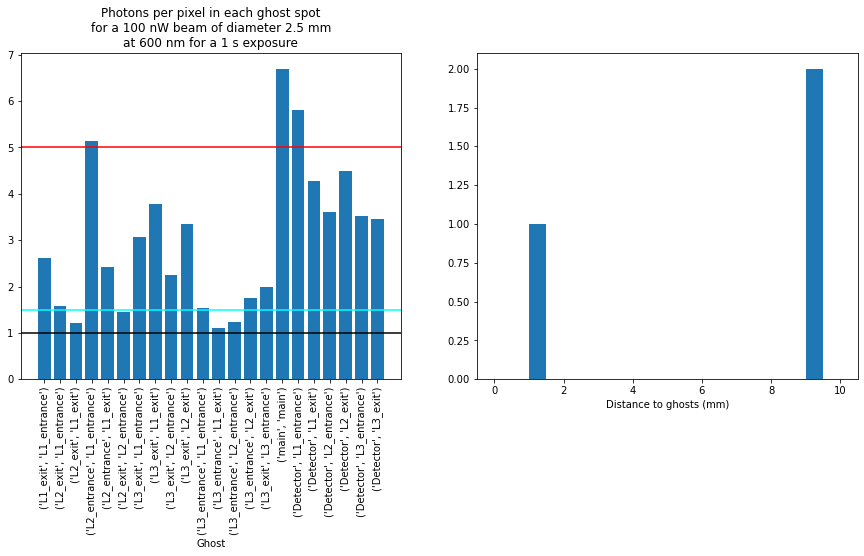

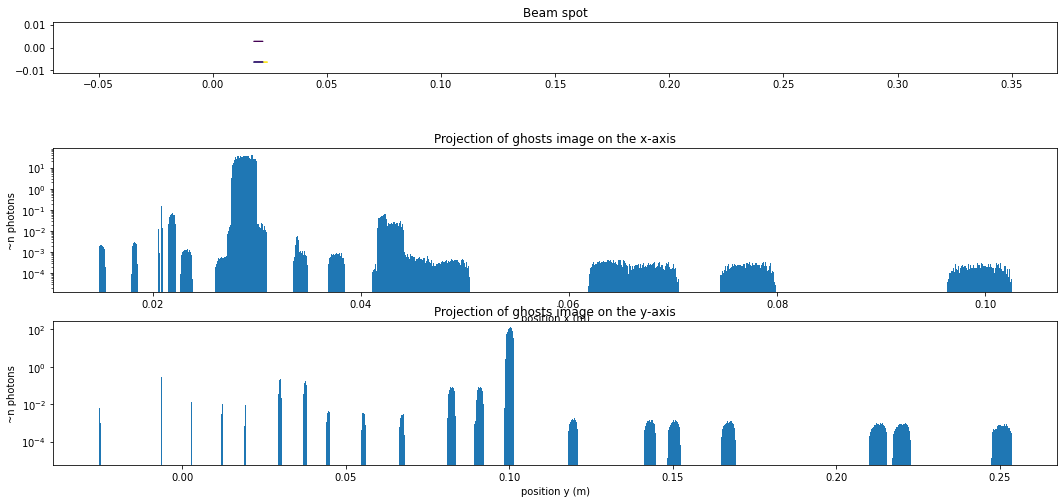

In [15]:
# Test beam - 1 degree Y - X
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999014
new_beam['x_offset'] = 0.
new_beam['y_offset'] = 0.1
new_beam['x_euler'] = 0
new_beam['y_euler'] = 1
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

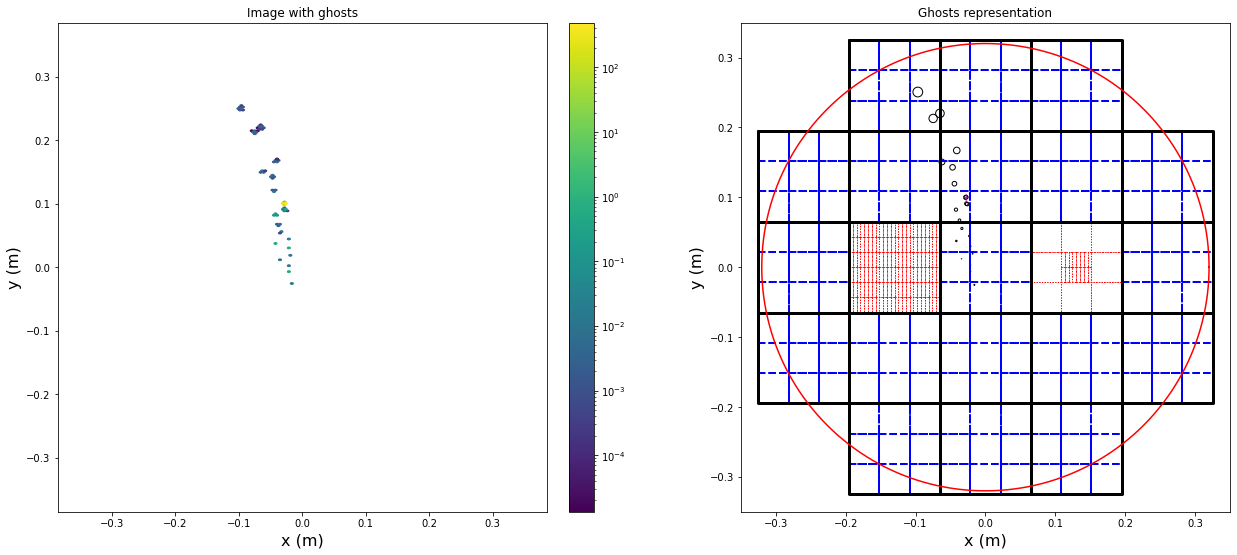

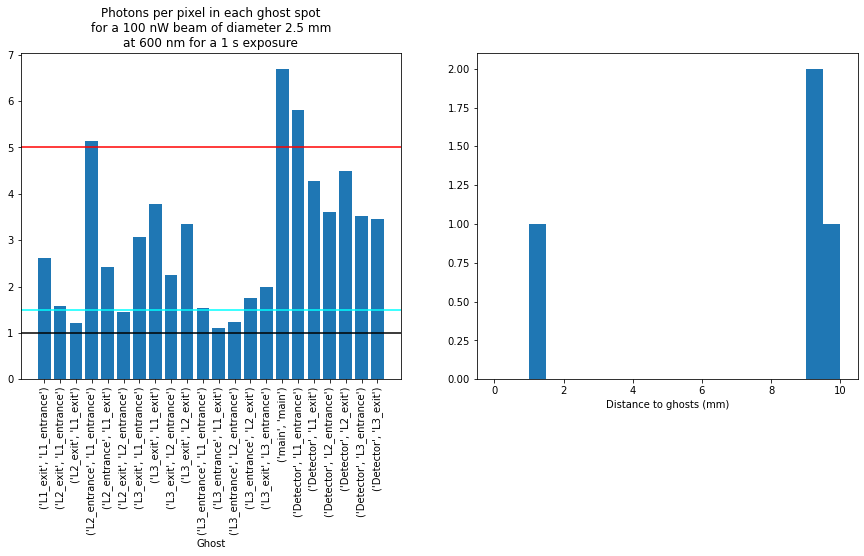

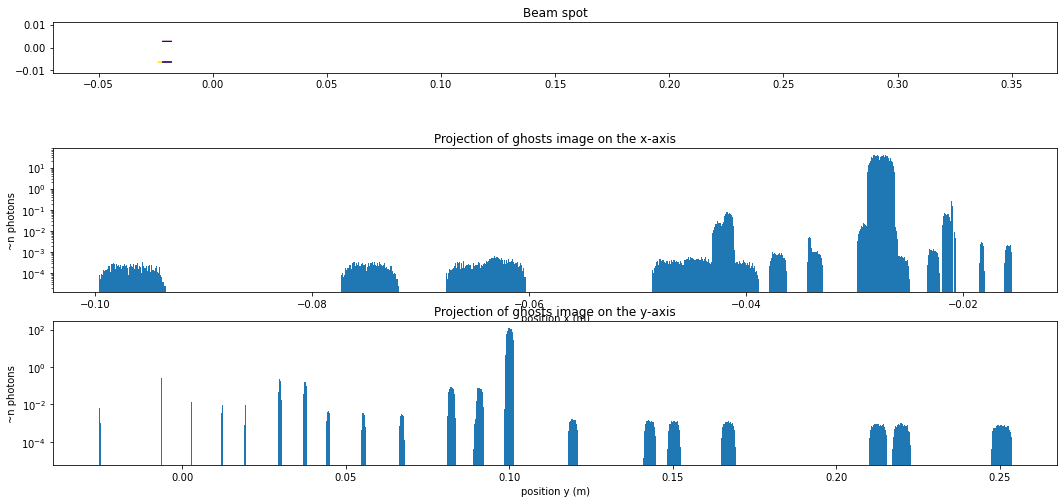

In [16]:
# Test beam - 1 degree Y - X
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999015
new_beam['x_offset'] = 0.
new_beam['y_offset'] = 0.1
new_beam['x_euler'] = 0
new_beam['y_euler'] = -1
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

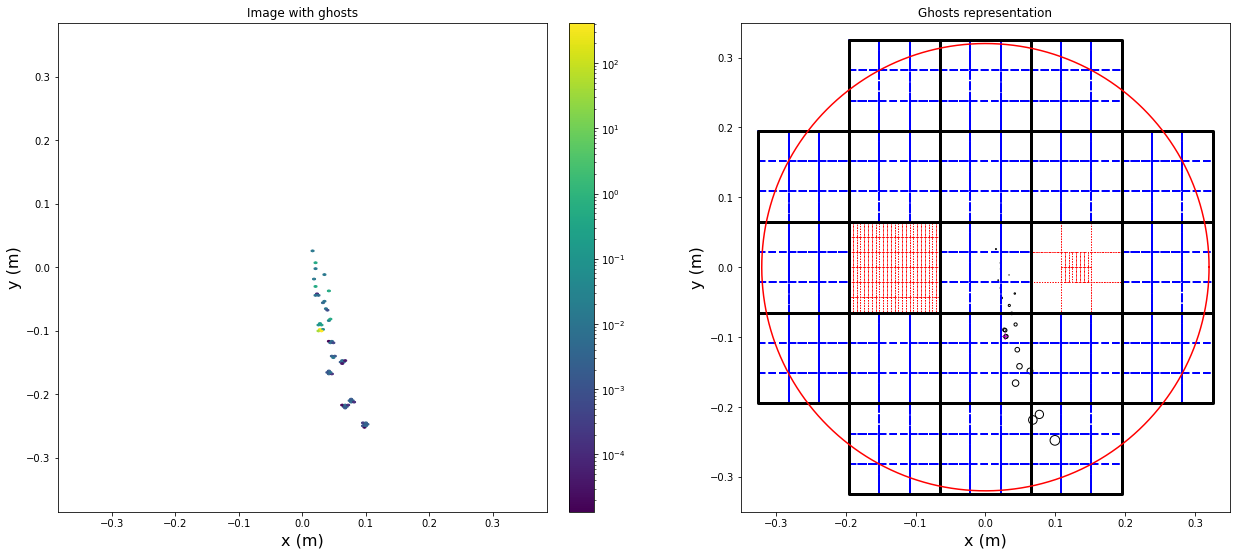

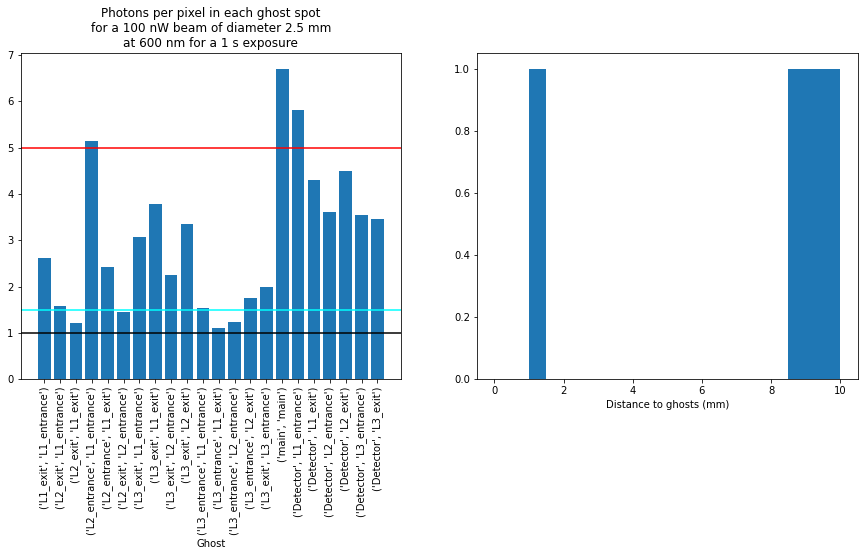

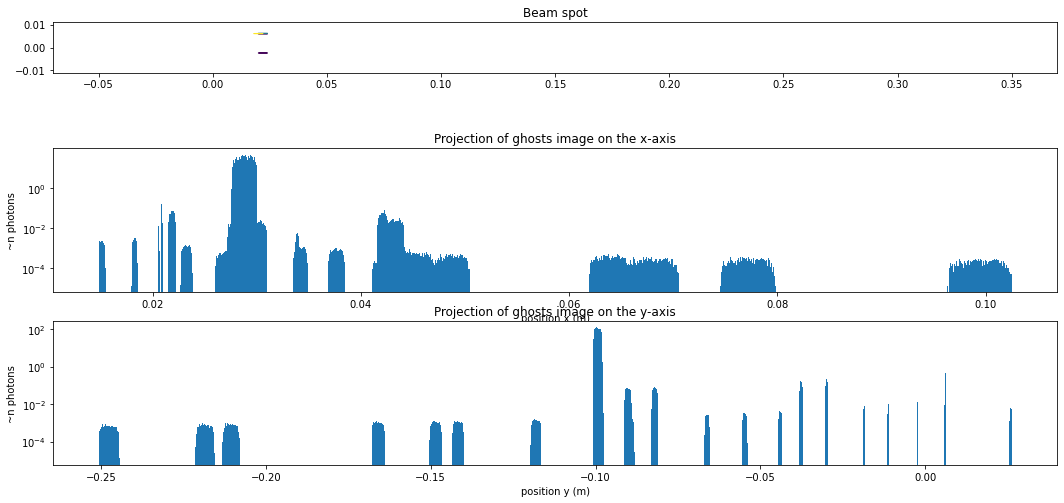

In [17]:
# Test beam - 1 degree Y - X
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999016
new_beam['x_offset'] = 0.
new_beam['y_offset'] = -0.1
new_beam['x_euler'] = 0
new_beam['y_euler'] = 1
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

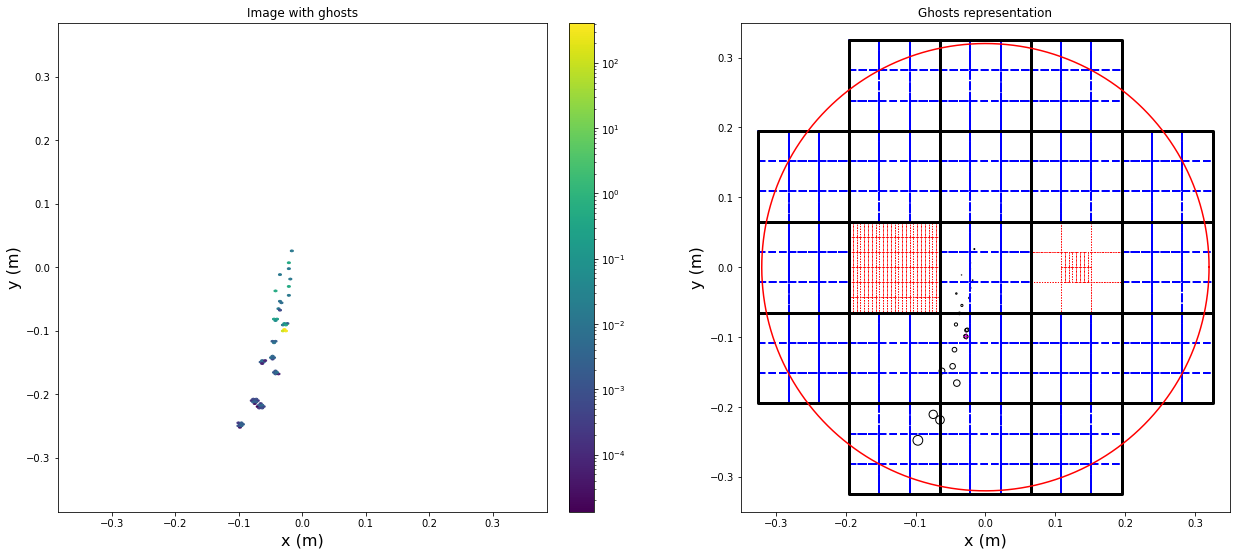

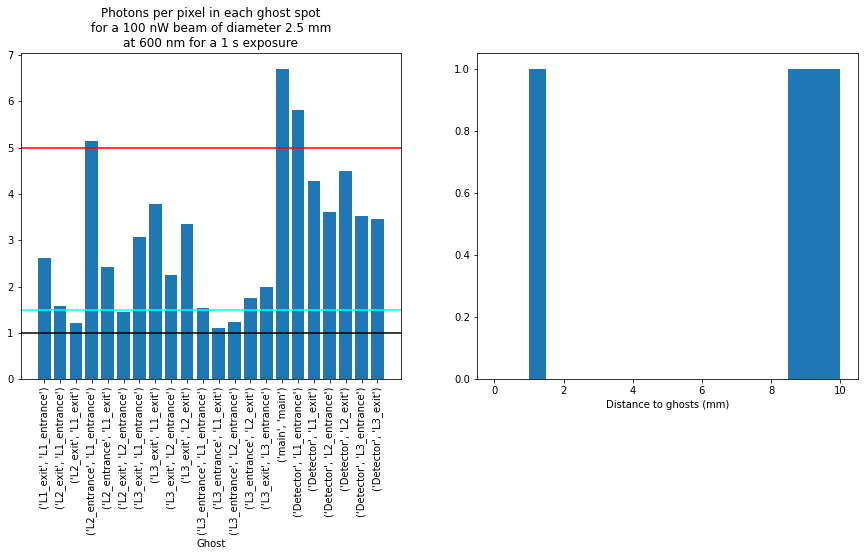

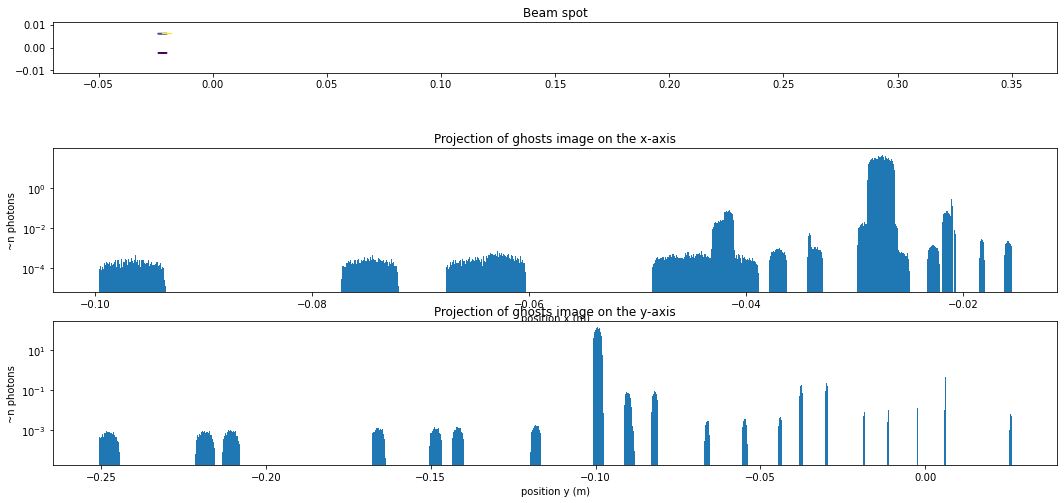

In [18]:
# Test beam - 1 degree Y - X
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999017
new_beam['x_offset'] = 0.
new_beam['y_offset'] = -0.1
new_beam['x_euler'] = 0
new_beam['y_euler'] = -1
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

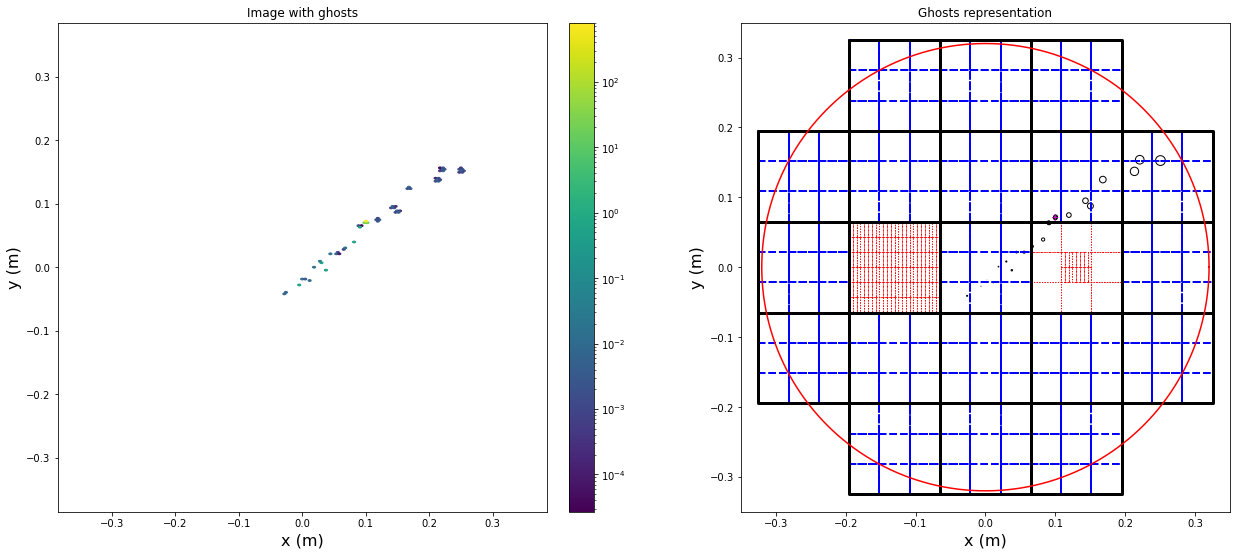

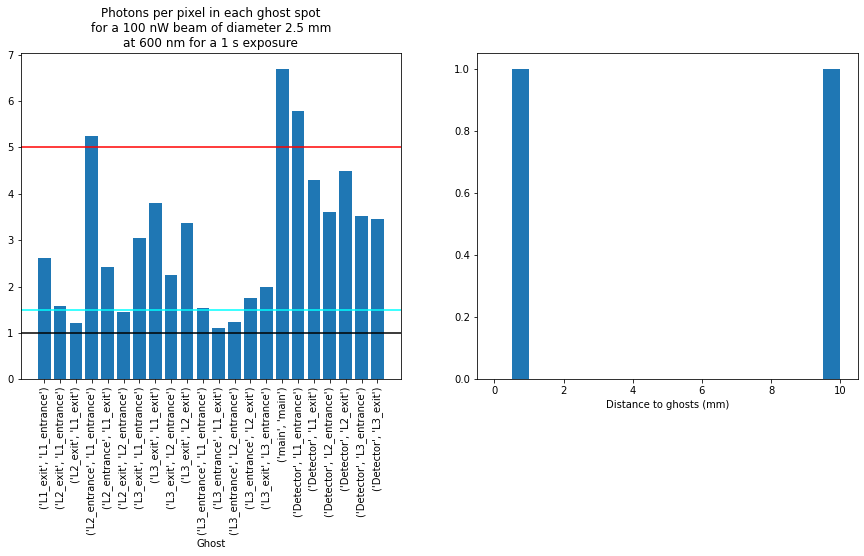

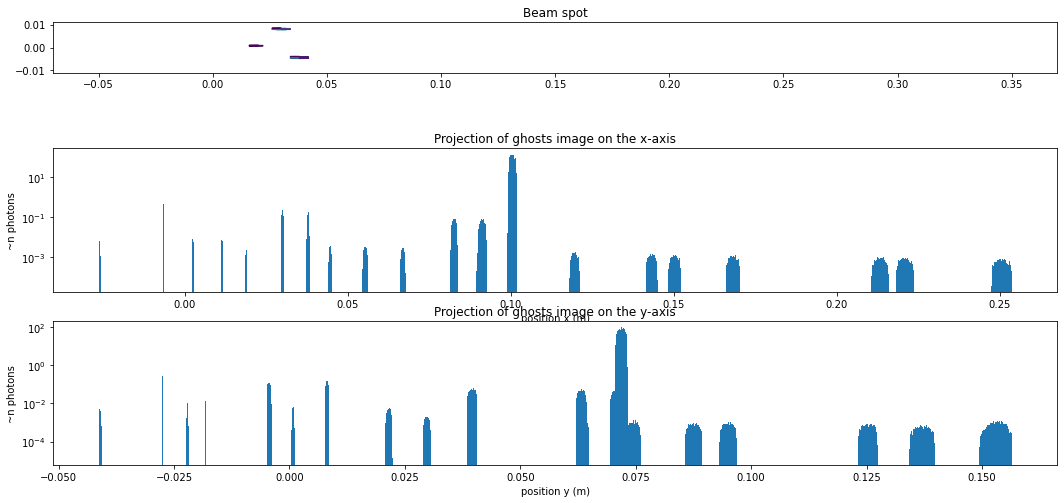

In [19]:
# Test beam - 
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999020
new_beam['x_offset'] = 0.1
new_beam['y_offset'] = 0.1
new_beam['x_euler'] = 1
new_beam['y_euler'] = 0
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

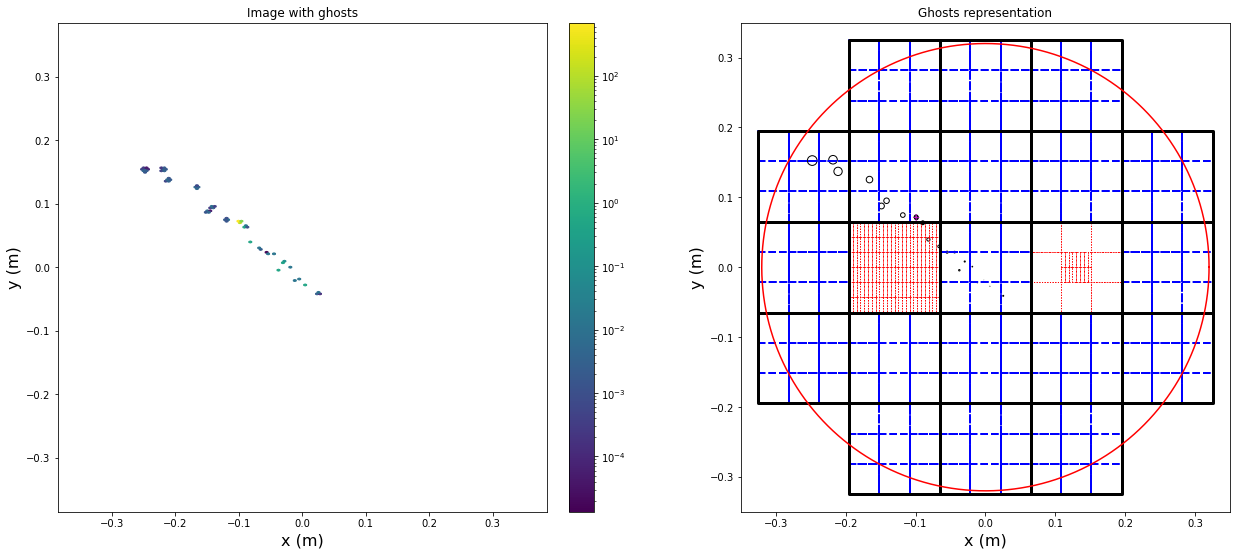

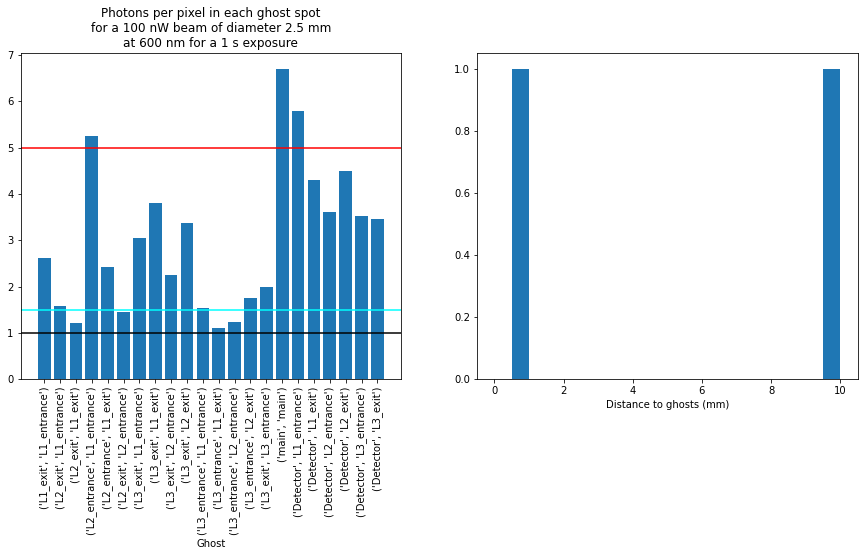

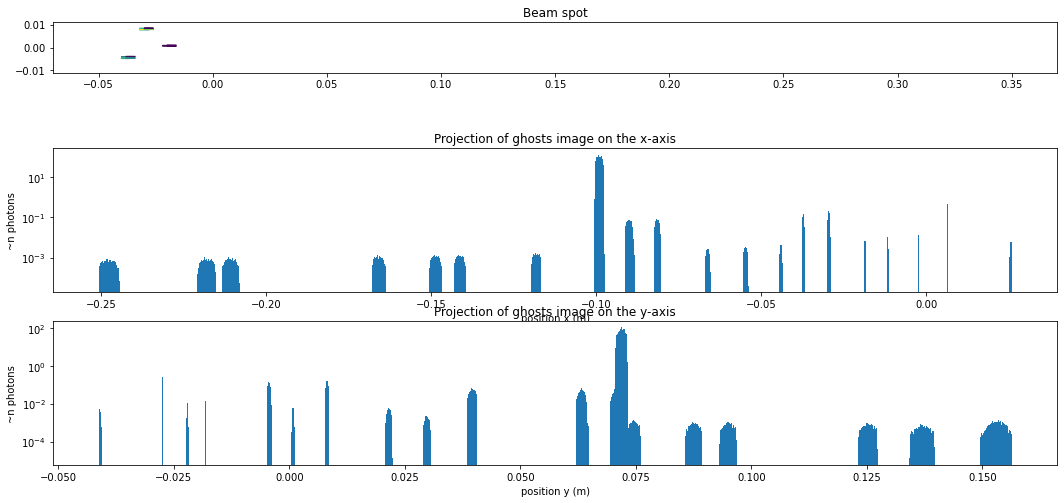

In [20]:
# Test beam - 
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999021
new_beam['x_offset'] = -0.1
new_beam['y_offset'] = 0.1
new_beam['x_euler'] = 1
new_beam['y_euler'] = 0
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

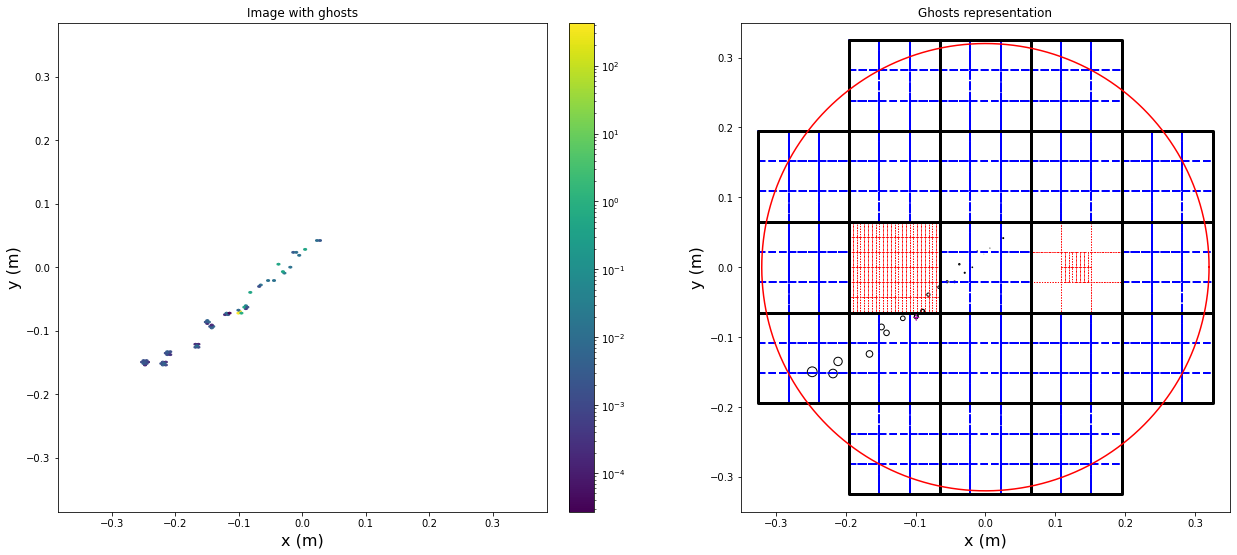

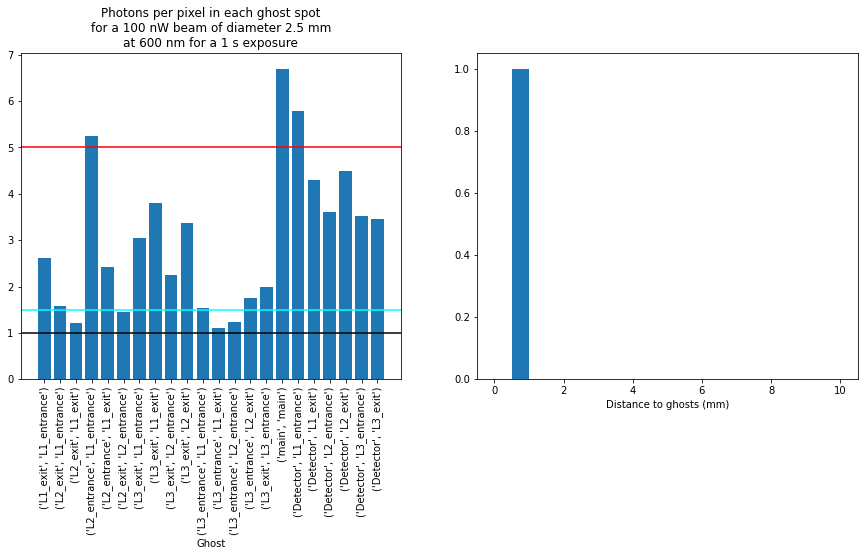

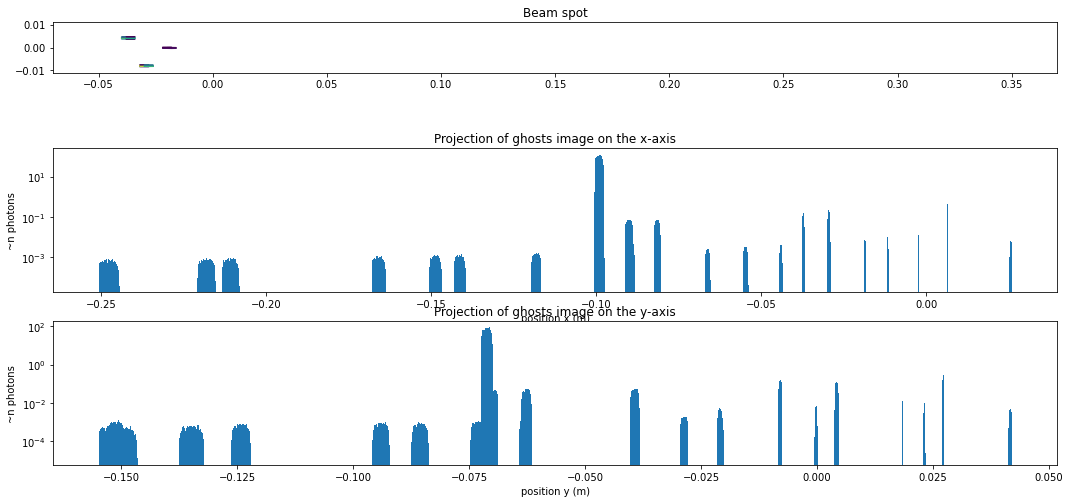

In [21]:
# Test beam - 
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999022
new_beam['x_offset'] = -0.1
new_beam['y_offset'] = -0.1
new_beam['x_euler'] = -1
new_beam['y_euler'] = 0
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

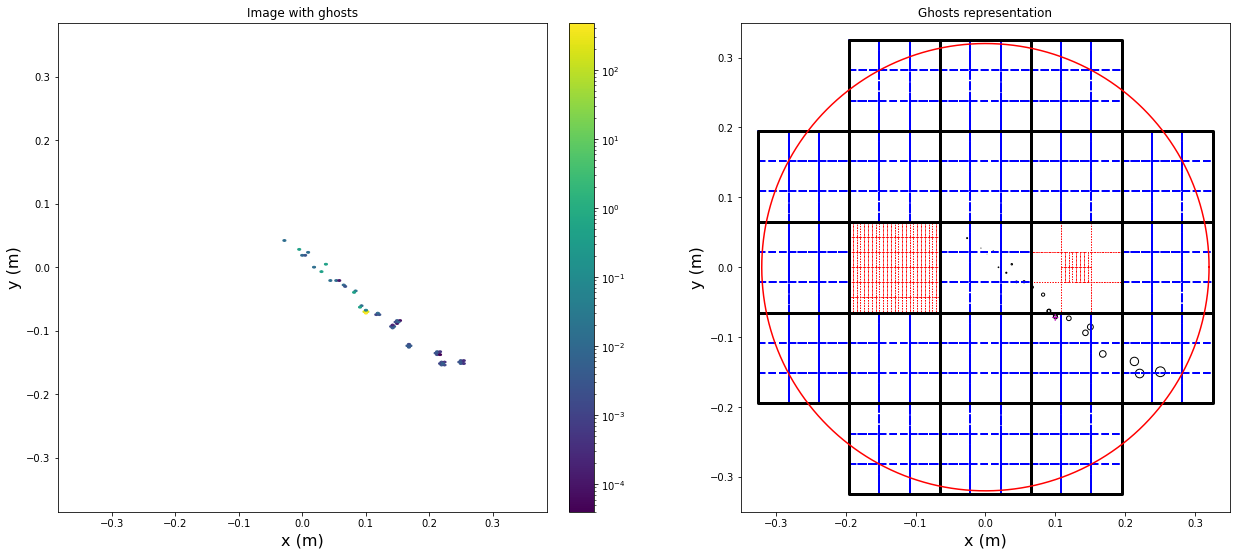

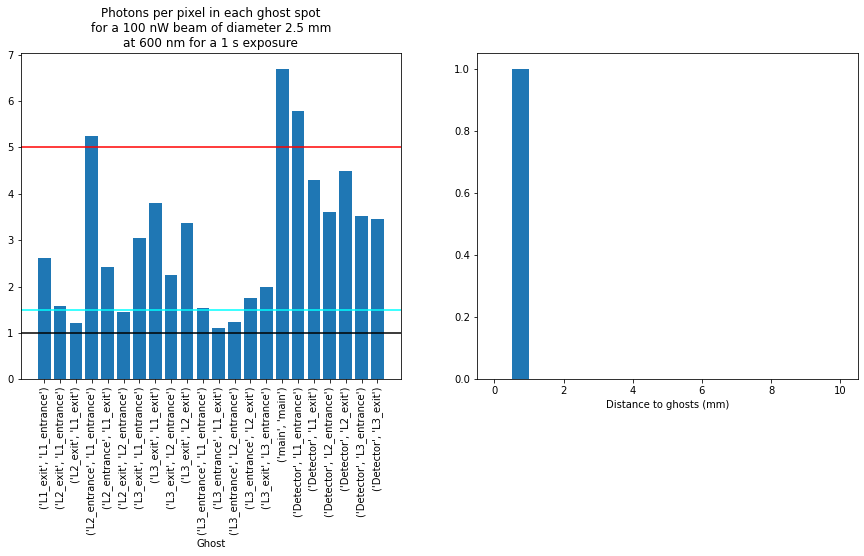

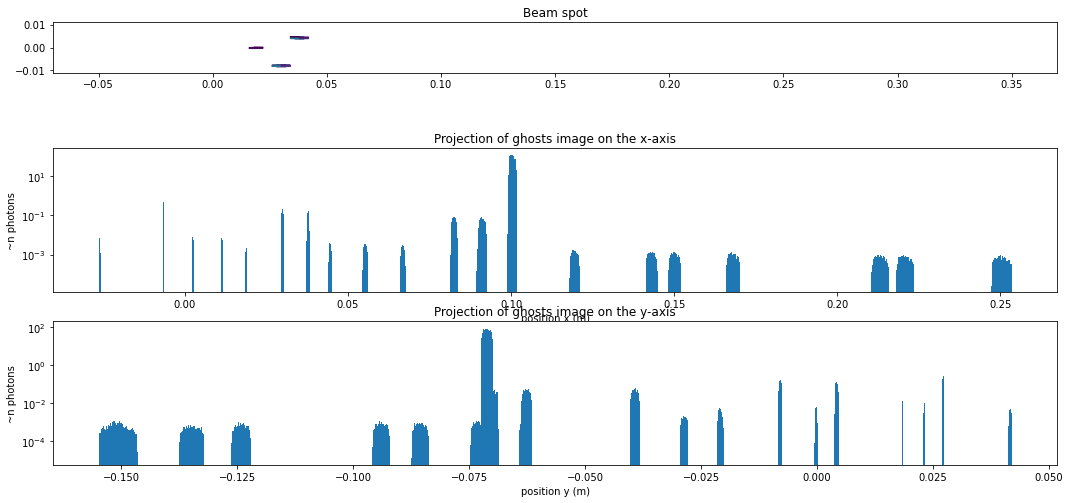

In [22]:
# Test beam - 
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999023
new_beam['x_offset'] = 0.1
new_beam['y_offset'] = -0.1
new_beam['x_euler'] = -1
new_beam['y_euler'] = 0
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

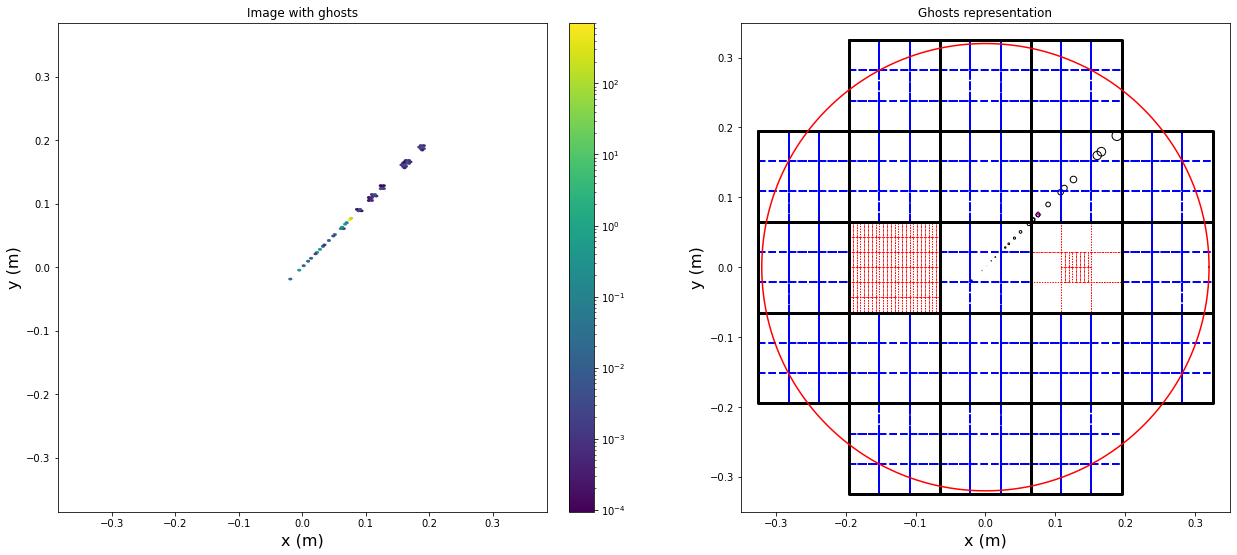

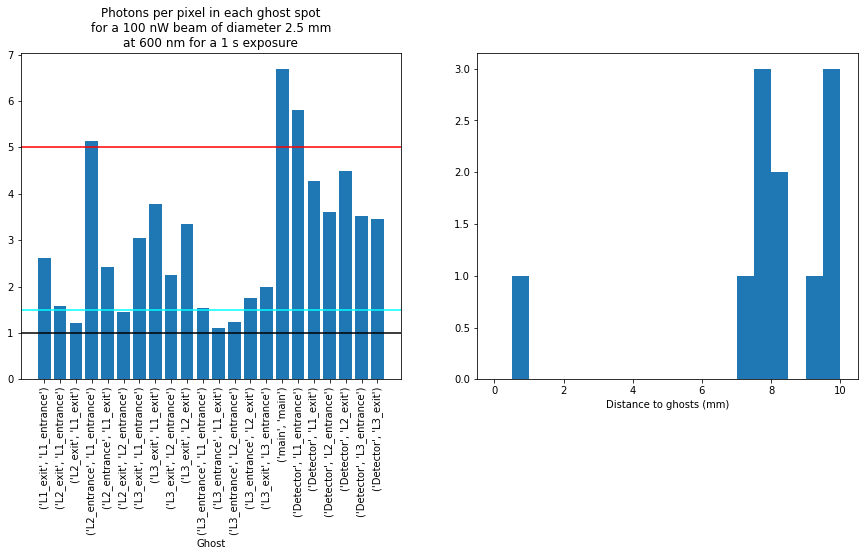

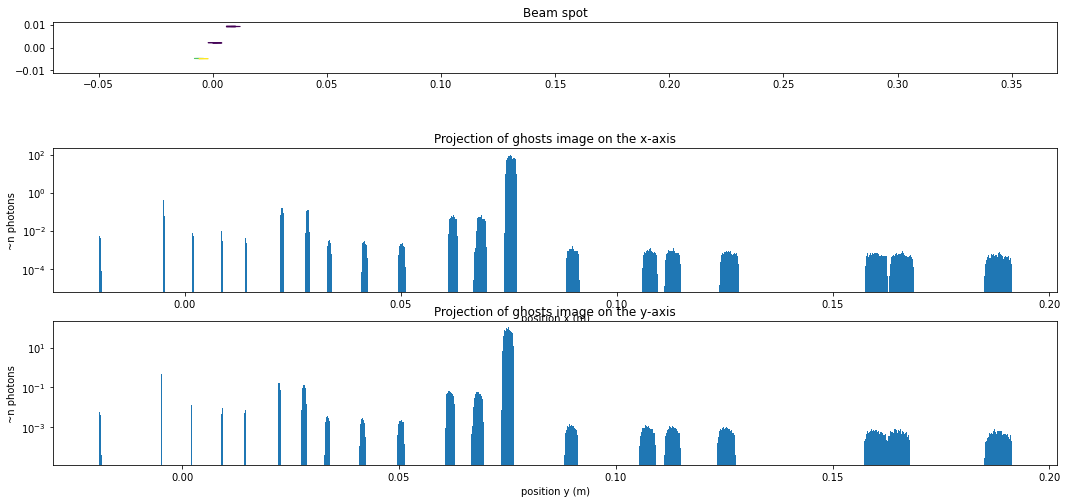

In [23]:
# Test beam - 
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999030
new_beam['x_offset'] = 0.075
new_beam['y_offset'] = 0.075
new_beam['x_euler'] = 0
new_beam['y_euler'] = 0
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

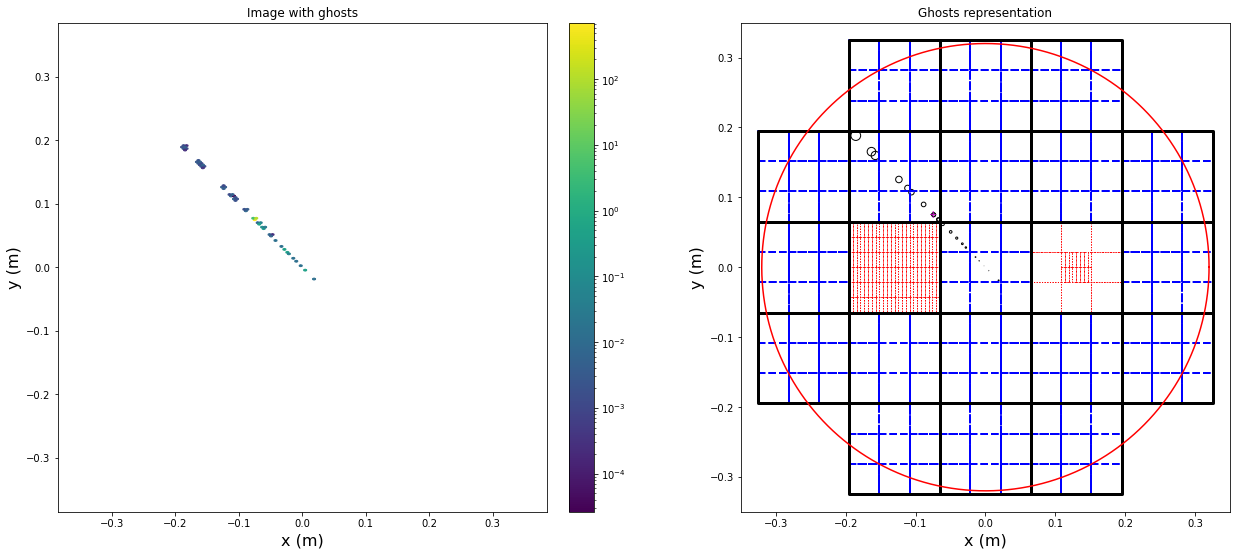

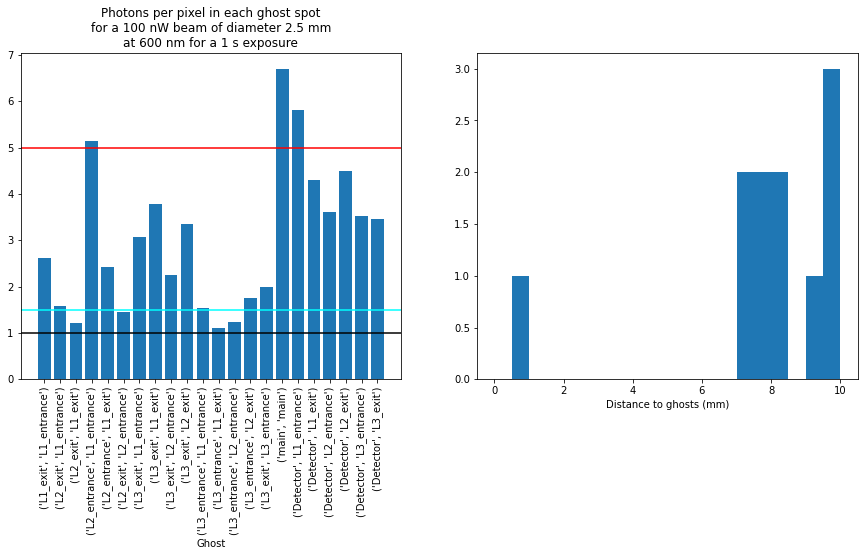

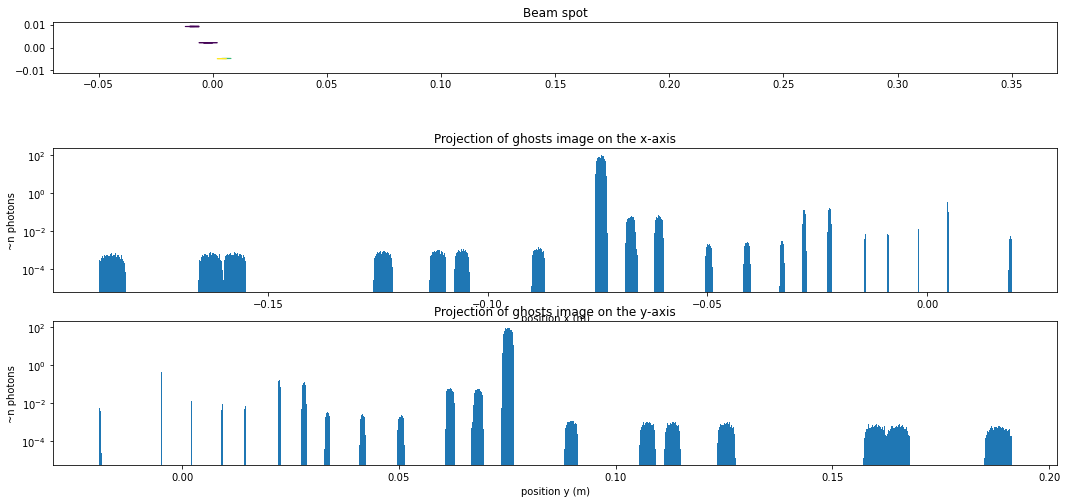

In [24]:
# Test beam - 
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999031
new_beam['x_offset'] = -0.075
new_beam['y_offset'] = 0.075
new_beam['x_euler'] = 0
new_beam['y_euler'] = 0
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

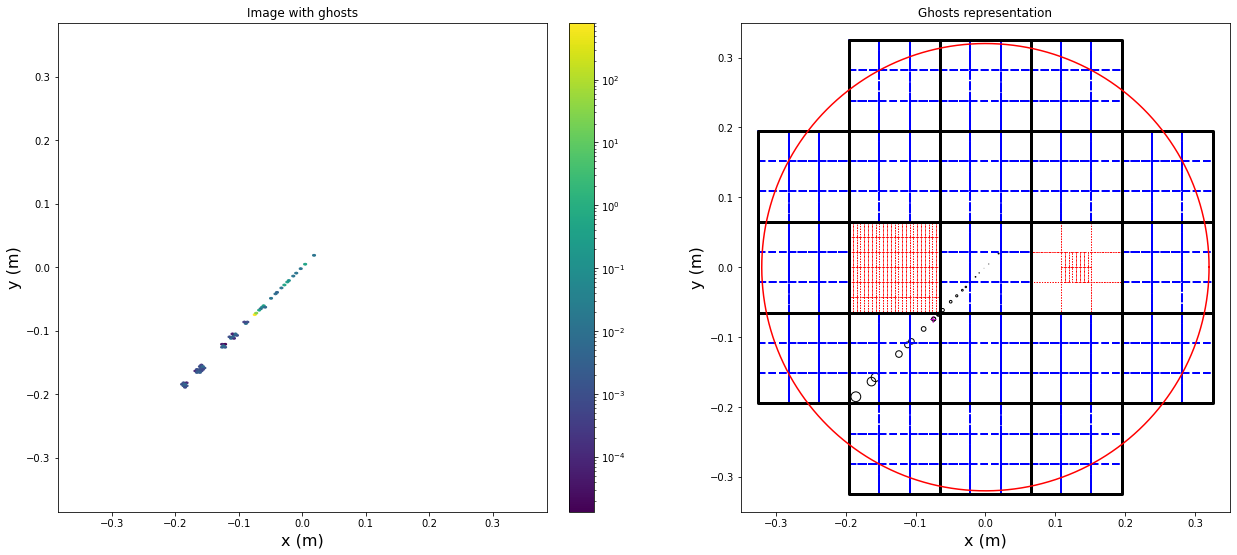

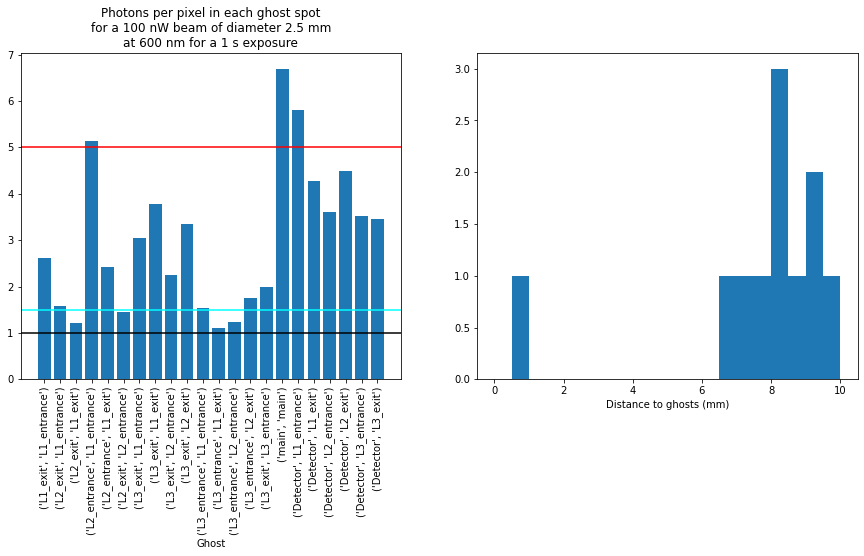

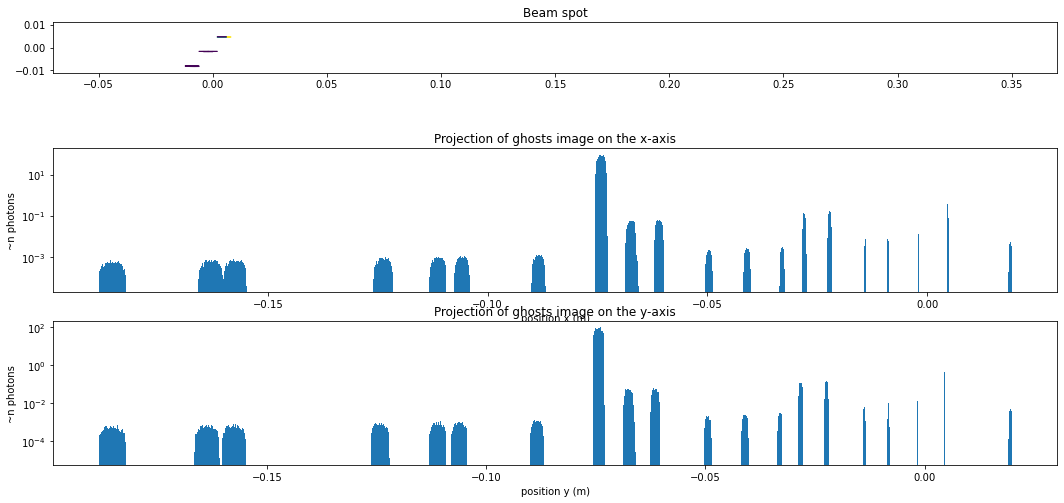

In [25]:
# Test beam - 
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999032
new_beam['x_offset'] = -0.075
new_beam['y_offset'] = -0.075
new_beam['x_euler'] = 0
new_beam['y_euler'] = 0
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

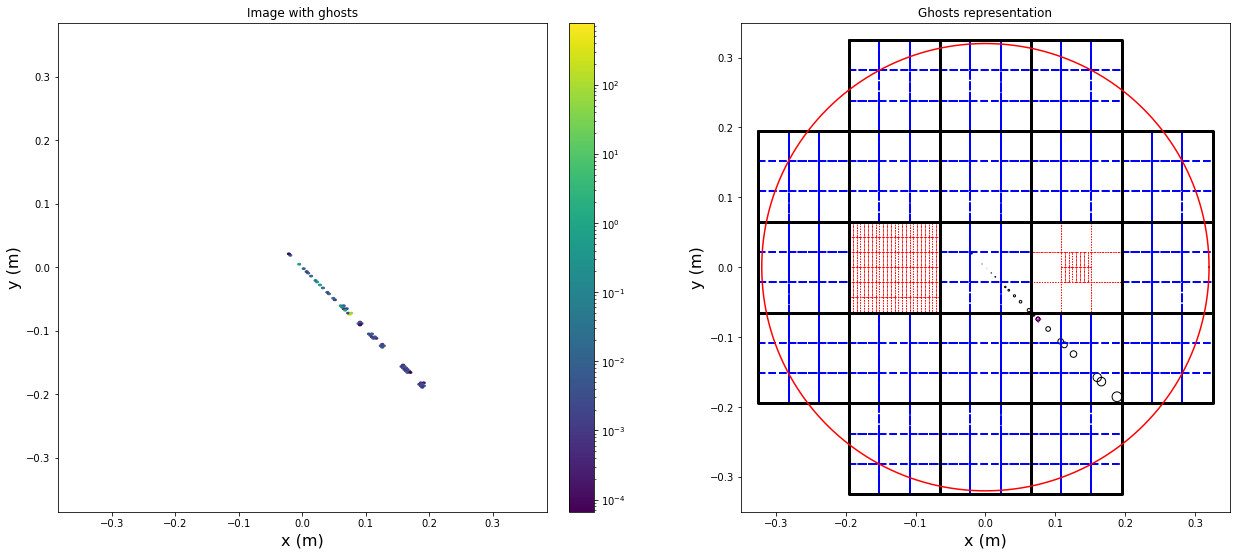

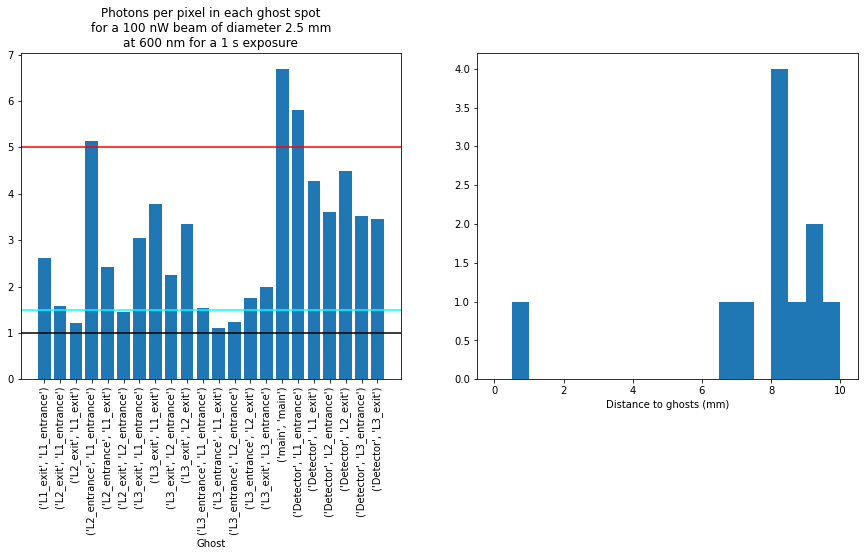

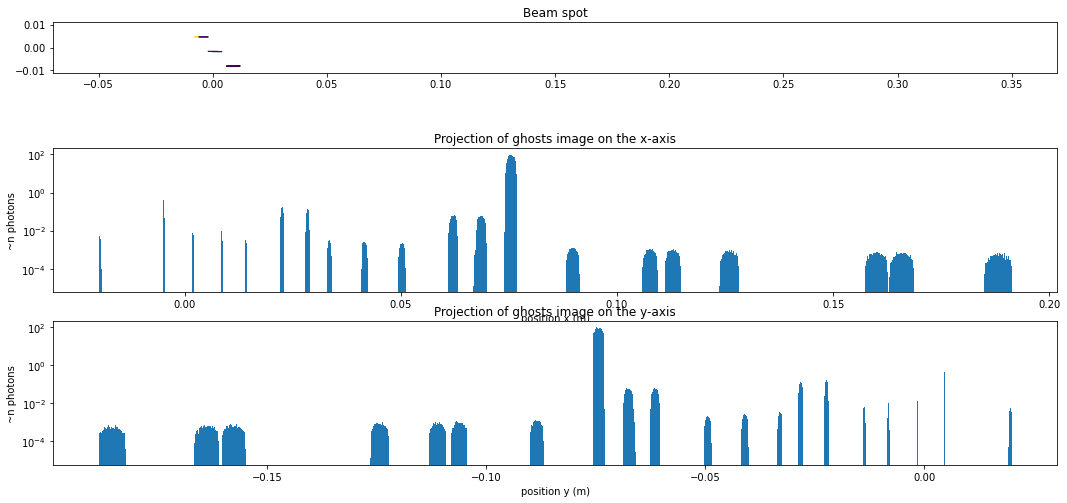

In [26]:
# Test beam - 
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999033
new_beam['x_offset'] = 0.075
new_beam['y_offset'] = -0.075
new_beam['x_euler'] = 0
new_beam['y_euler'] = 0
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

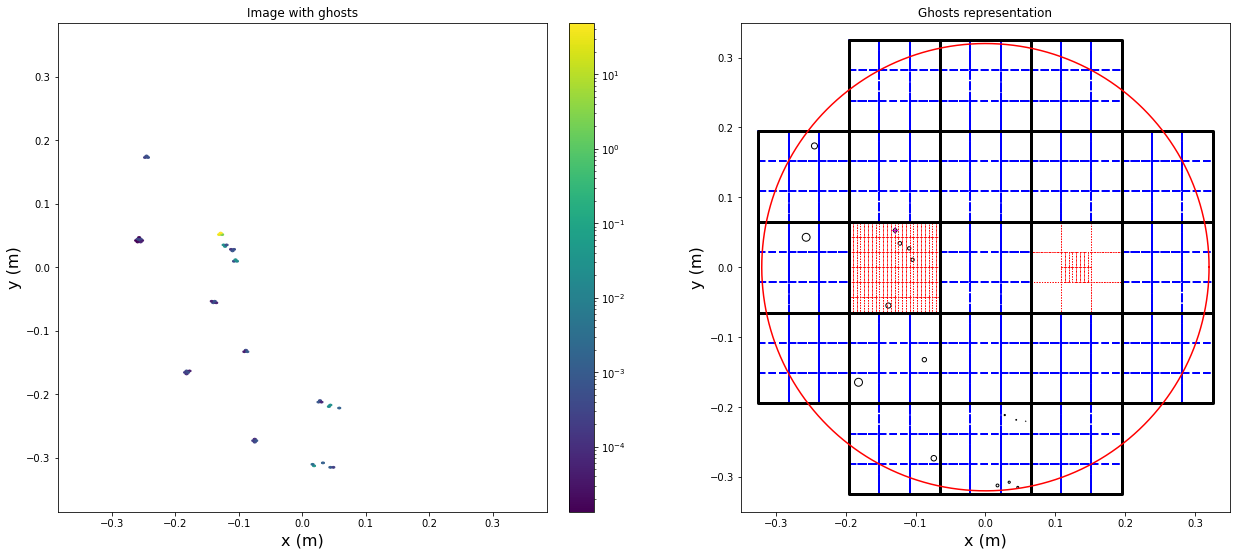

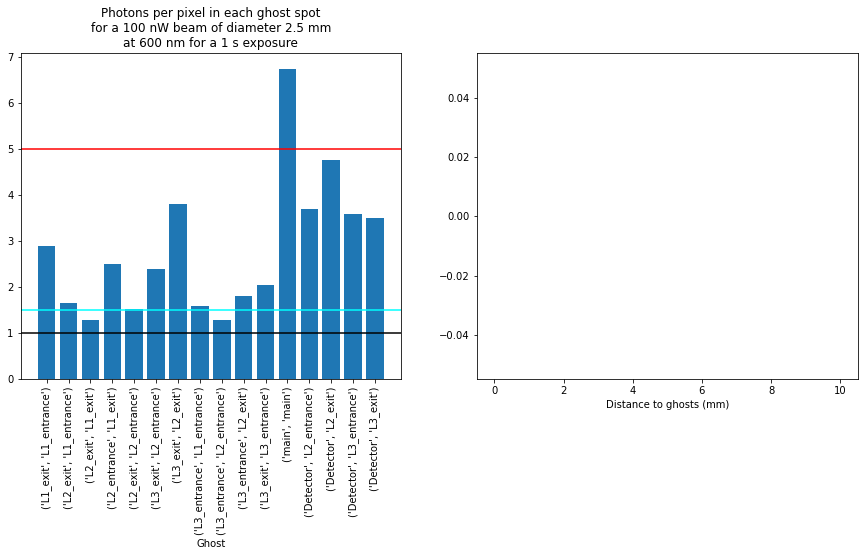

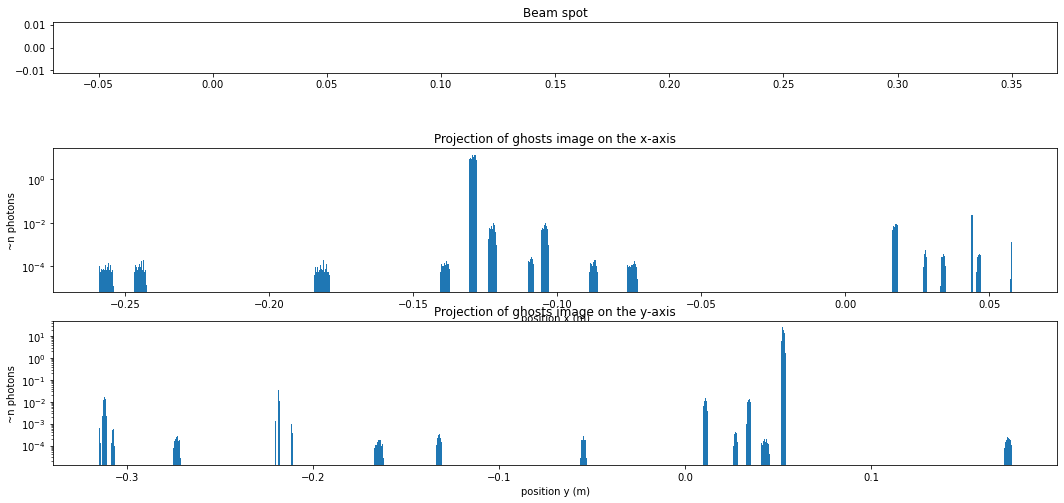

In [27]:
# Test beam - 
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999040
new_beam['n_photons'] = 100
new_beam['x_offset'] = -0.3
new_beam['y_offset'] = 0.55
new_beam['x_euler'] = 17
new_beam['y_euler'] = 6
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

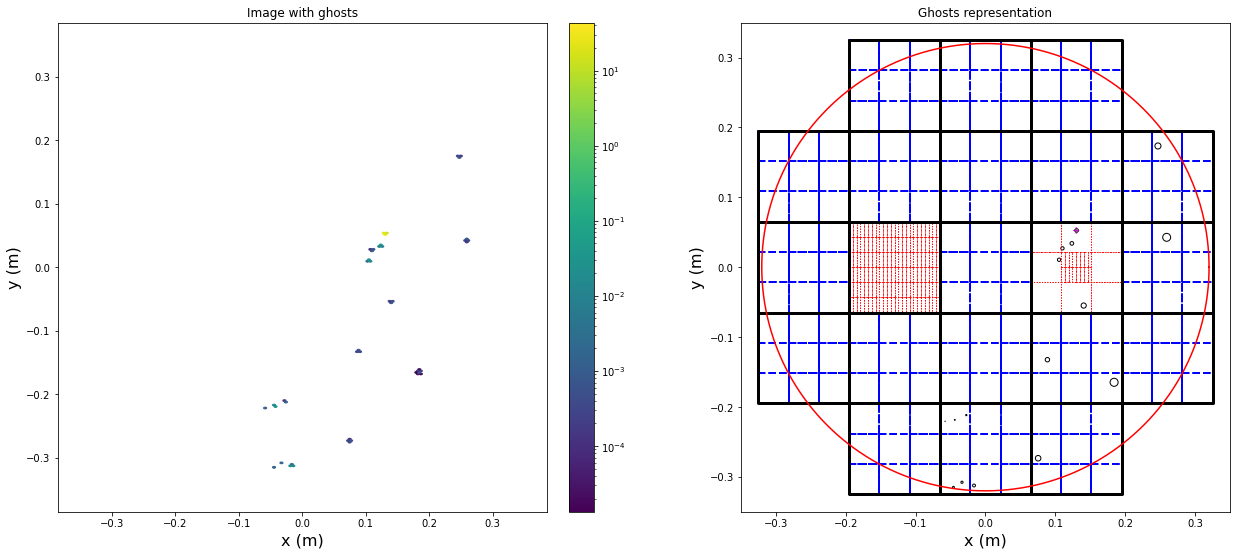

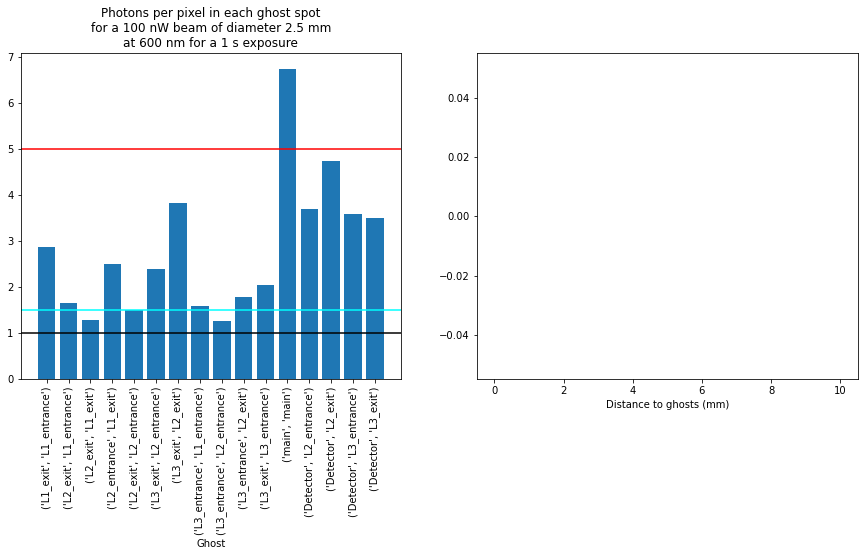

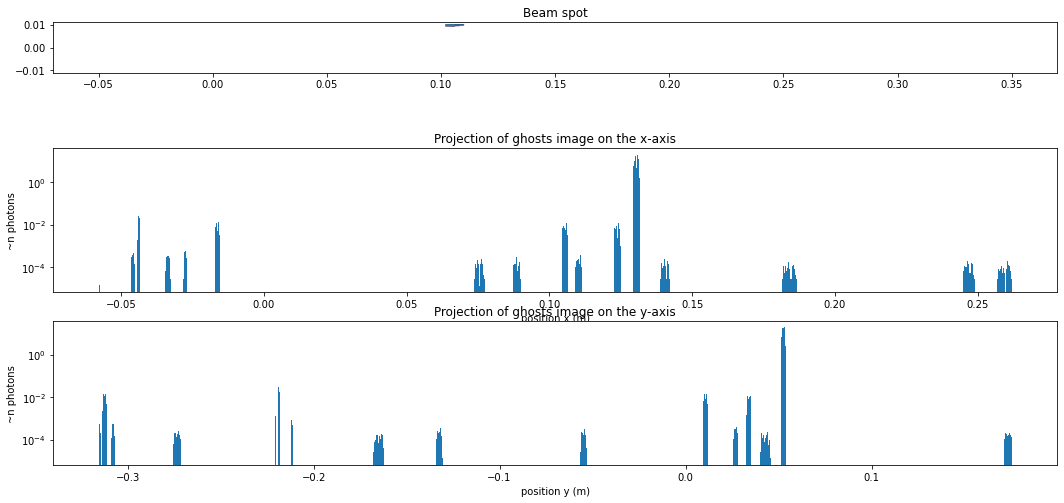

In [28]:
# Test beam - 
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999041
new_beam['n_photons'] = 100
new_beam['x_offset'] = +0.3
new_beam['y_offset'] = 0.55
new_beam['x_euler'] = 17
new_beam['y_euler'] = -6
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

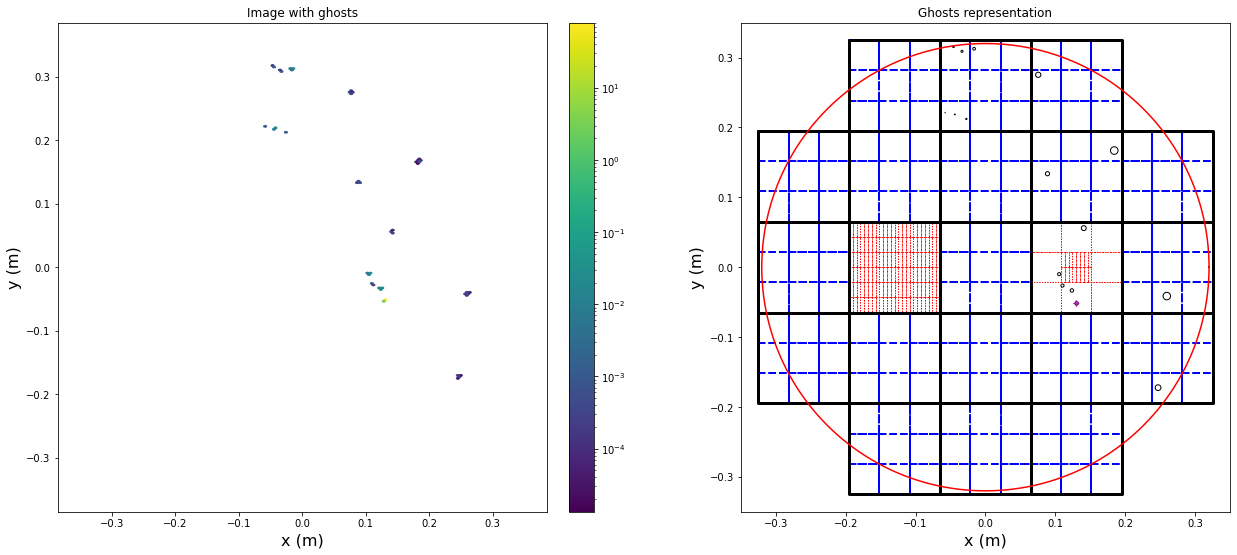

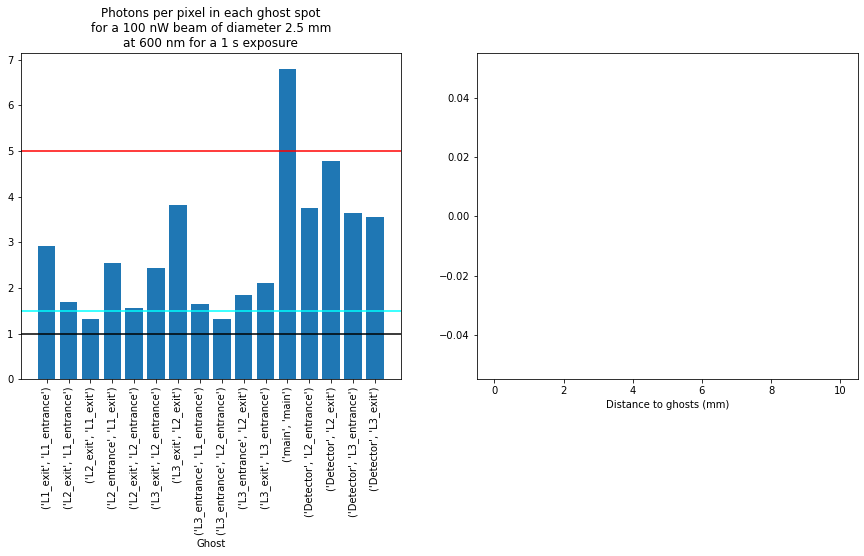

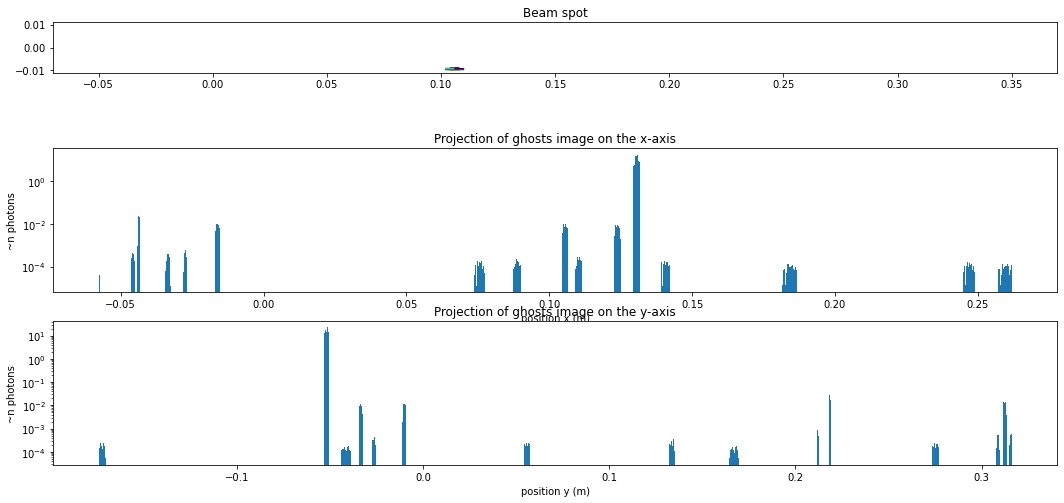

In [29]:
# Test beam - 
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999042
new_beam['n_photons'] = 100
new_beam['x_offset'] = +0.3
new_beam['y_offset'] = -0.55
new_beam['x_euler'] = -17
new_beam['y_euler'] = -6
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

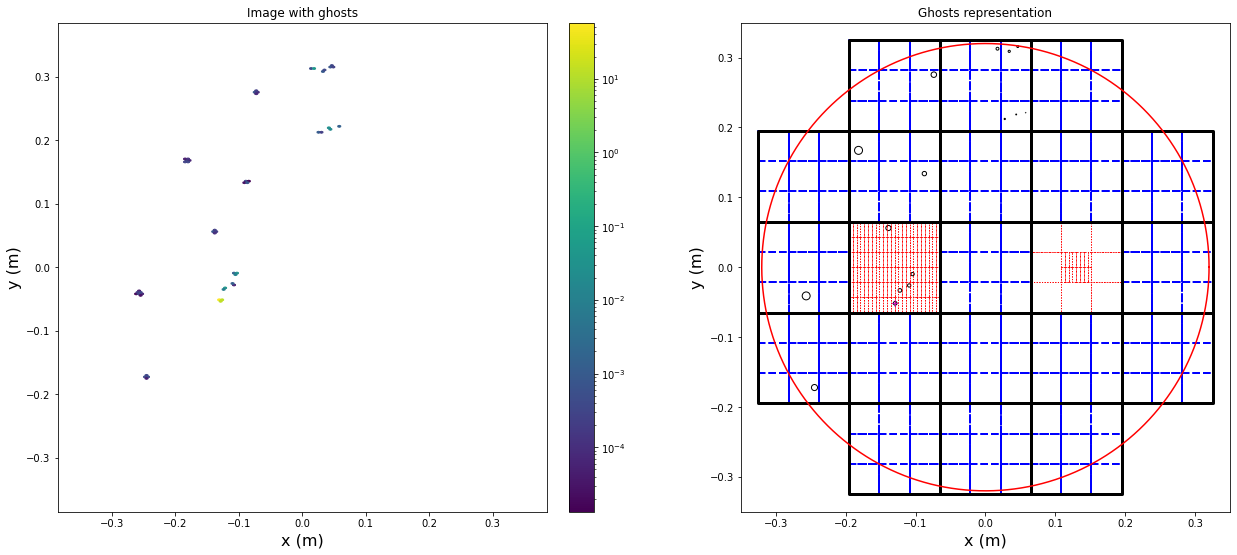

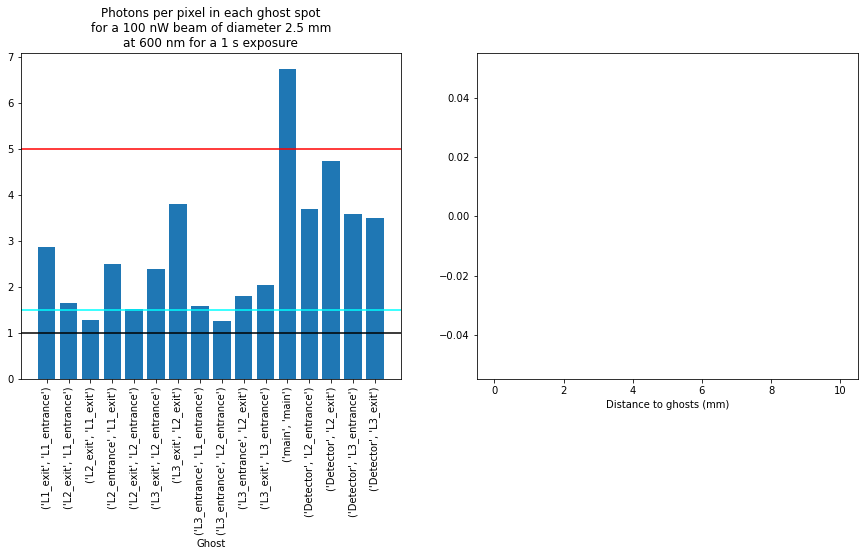

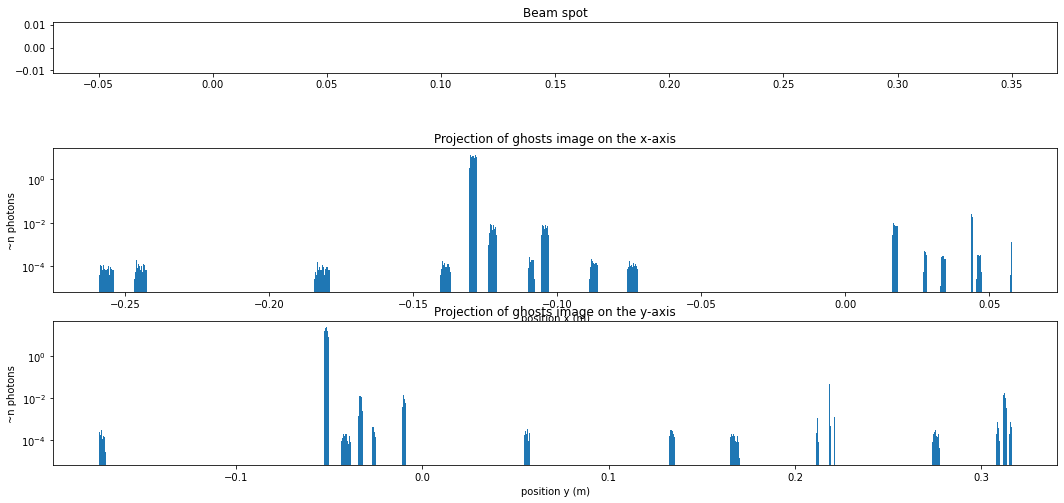

In [30]:
# Test beam - 
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999043
new_beam['n_photons'] = 100
new_beam['x_offset'] = -0.3
new_beam['y_offset'] = -0.55
new_beam['x_euler'] = -17
new_beam['y_euler'] = +6
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

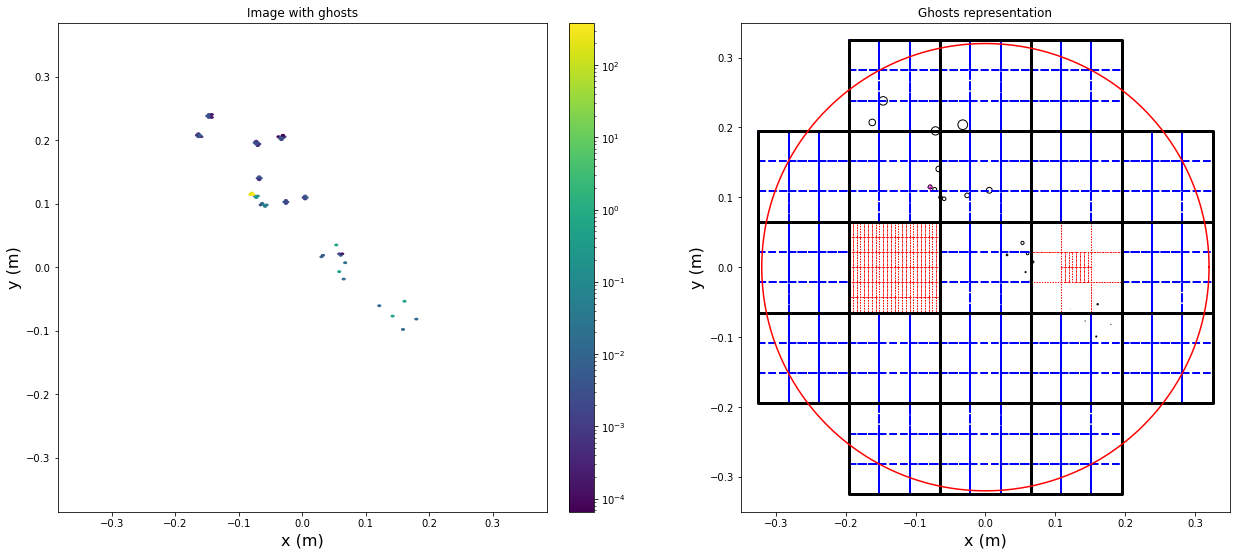

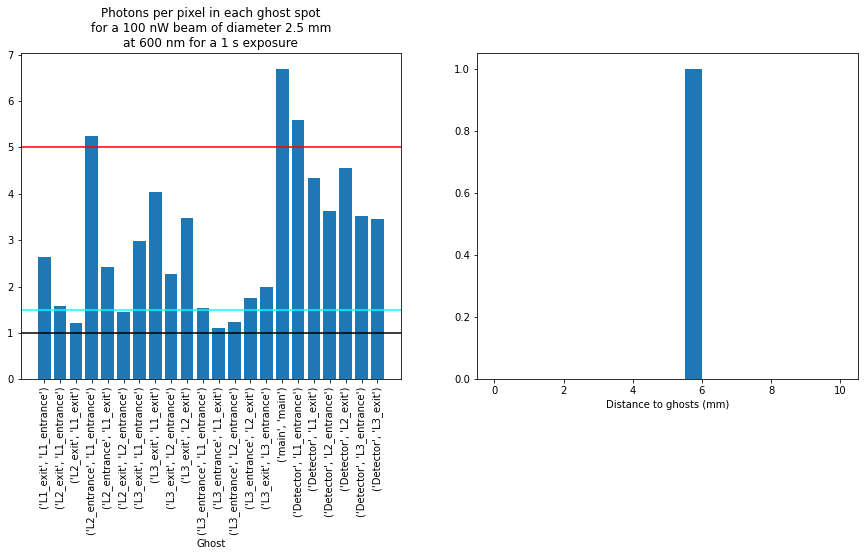

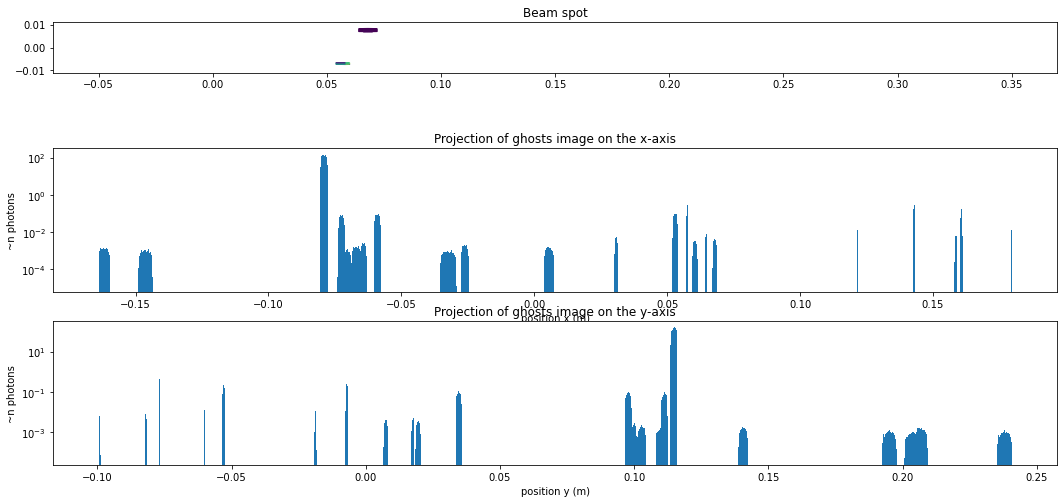

In [31]:
# Test beam - BEAM_CONFIG_4
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999050
new_beam['x_offset'] = -0.25
new_beam['y_offset'] = 0.2
new_beam['x_euler'] = 3
new_beam['y_euler'] = 6
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

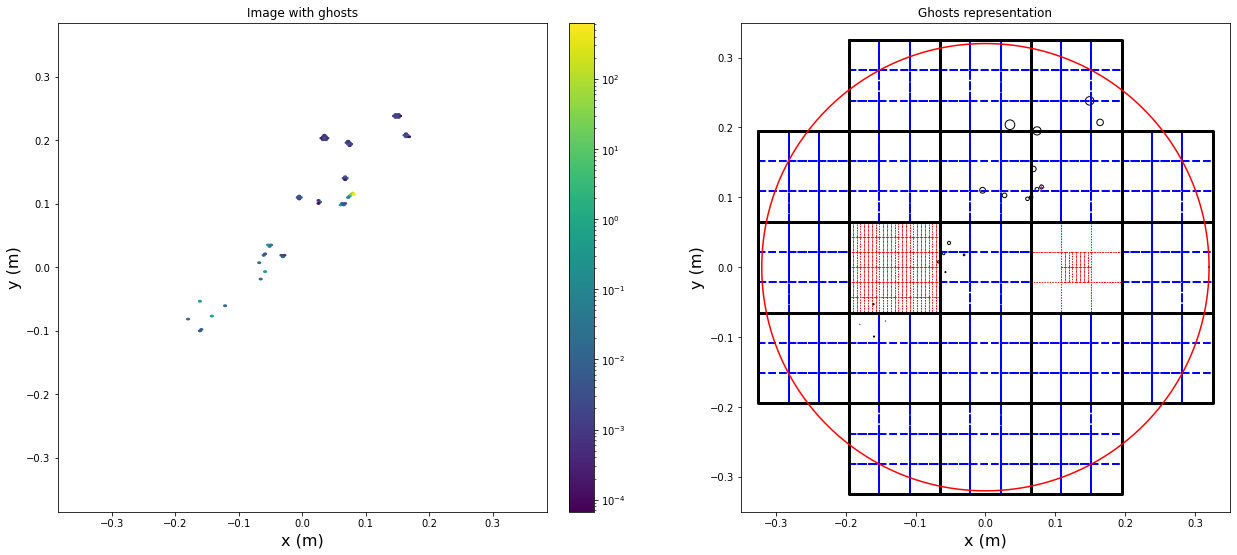

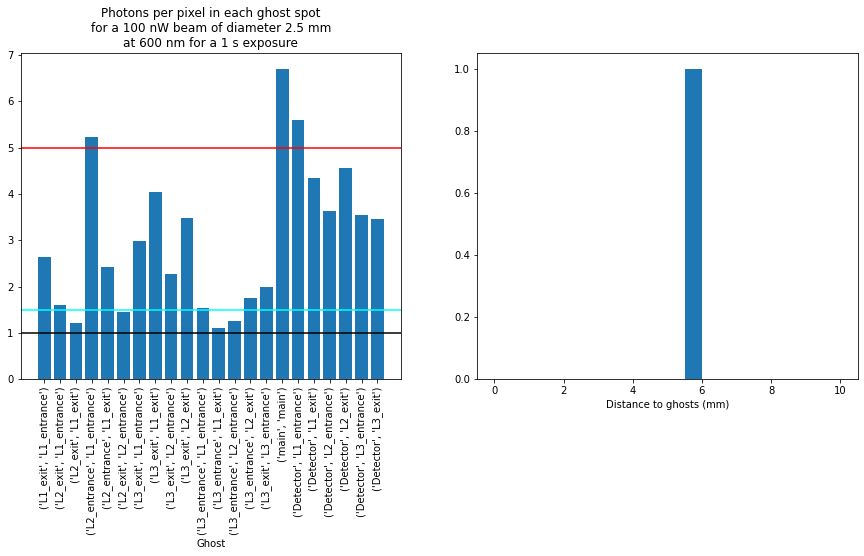

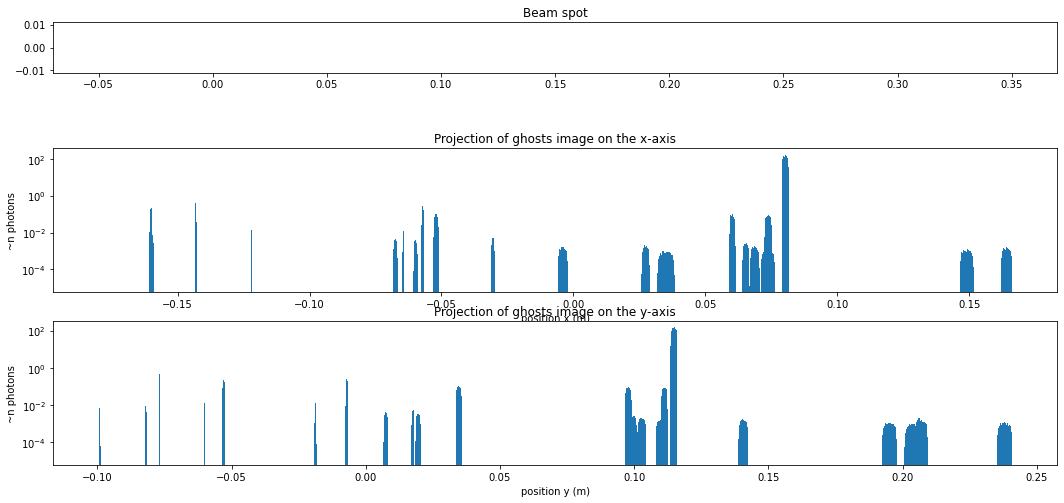

In [32]:
# Test beam - BEAM_CONFIG_4
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999051
new_beam['x_offset'] = 0.25
new_beam['y_offset'] = 0.2
new_beam['x_euler'] = 3
new_beam['y_euler'] = -6
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

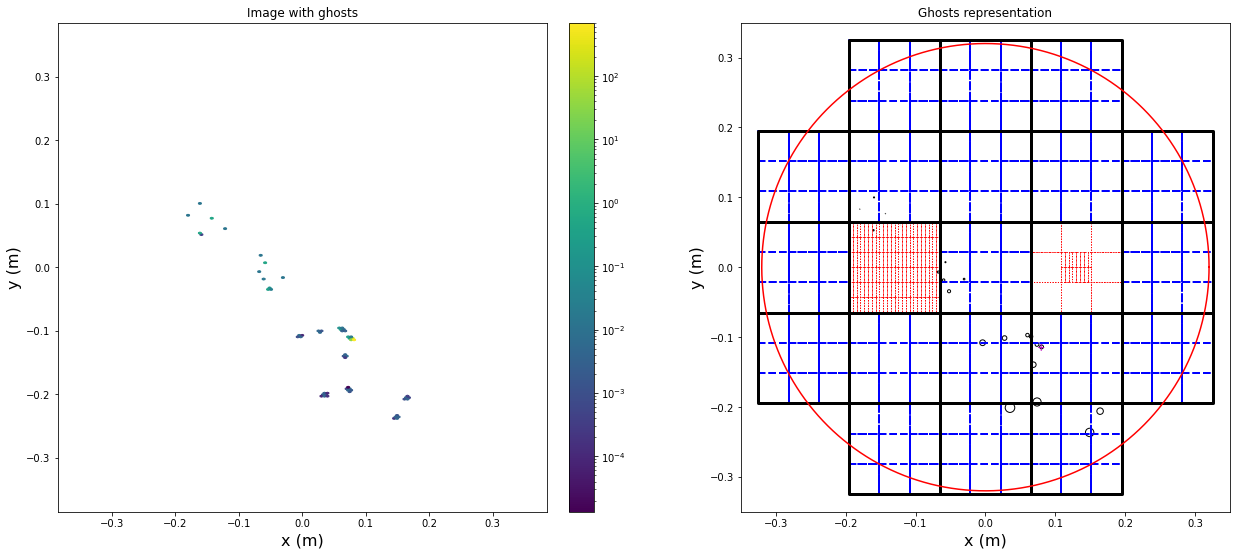

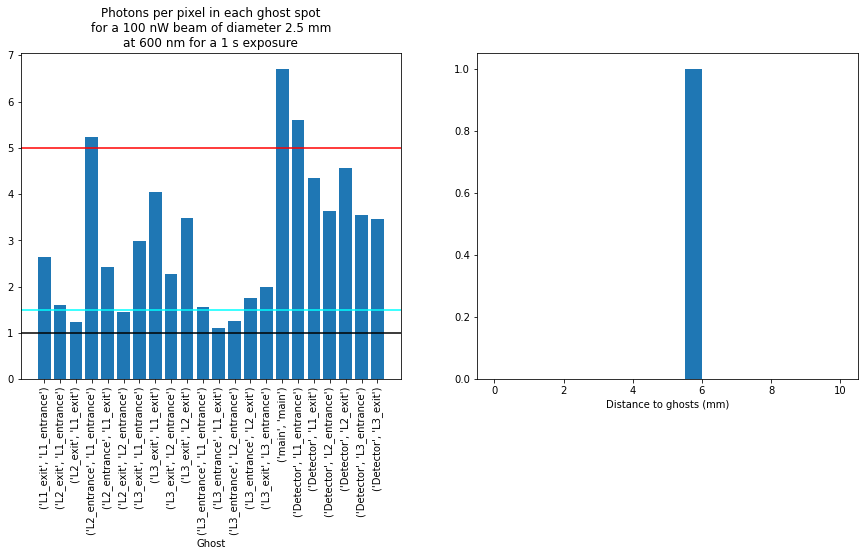

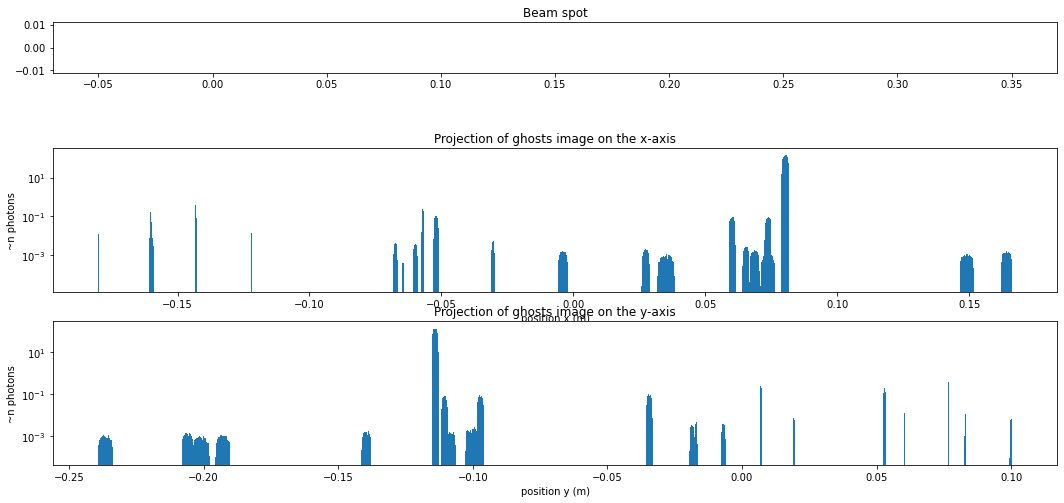

In [33]:
# Test beam - BEAM_CONFIG_4
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999052
new_beam['x_offset'] = 0.25
new_beam['y_offset'] = -0.2
new_beam['x_euler'] = -3
new_beam['y_euler'] = -6
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

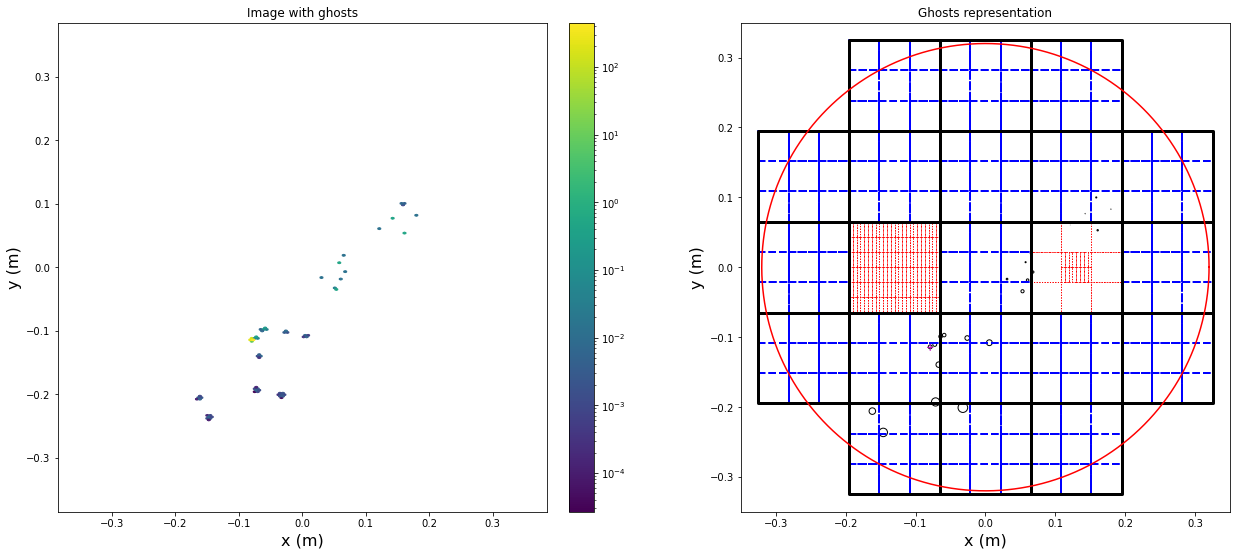

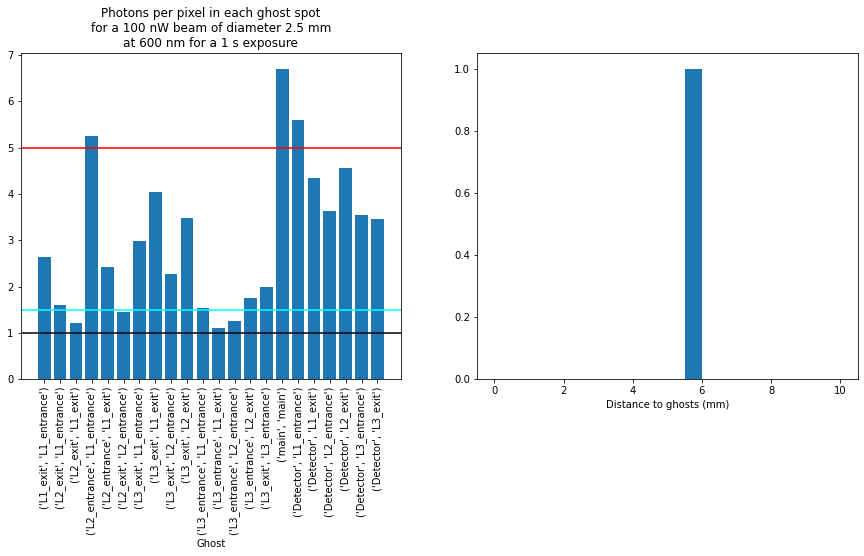

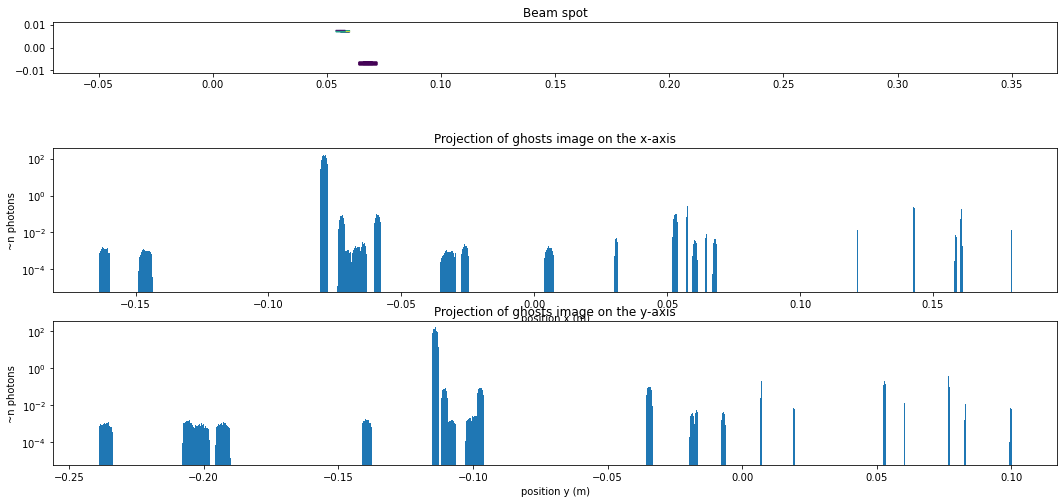

In [34]:
# Test beam - BEAM_CONFIG_4
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999053
new_beam['x_offset'] = -0.25
new_beam['y_offset'] = -0.2
new_beam['x_euler'] = -3
new_beam['y_euler'] = 6
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

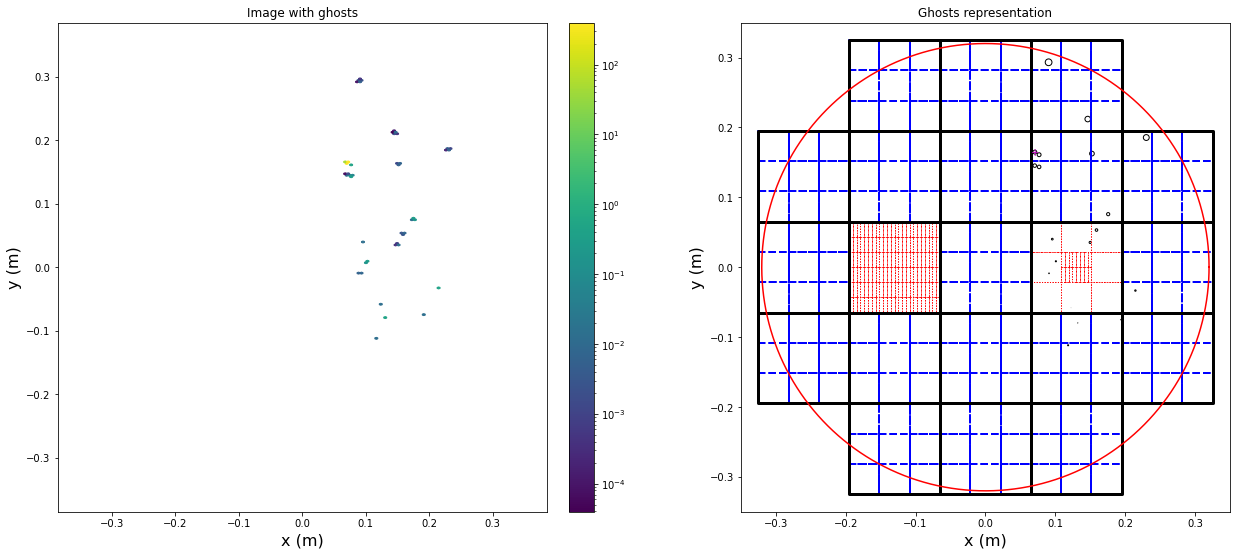

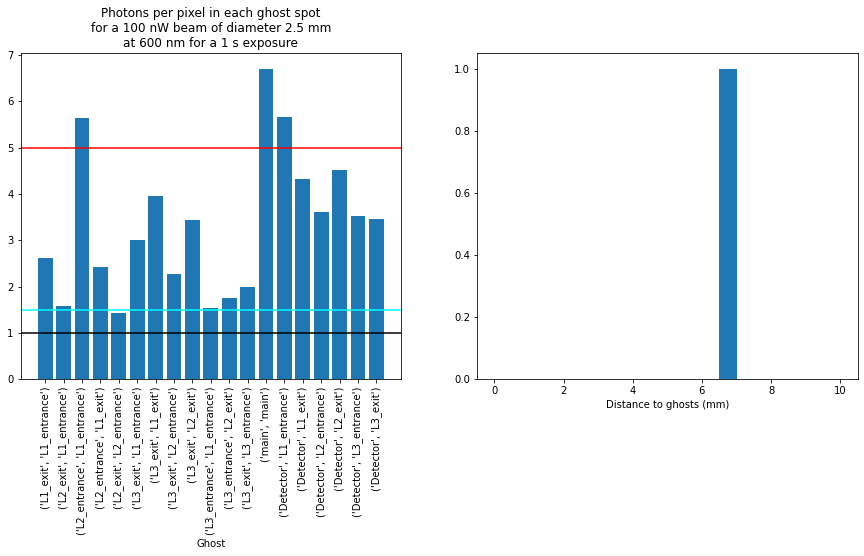

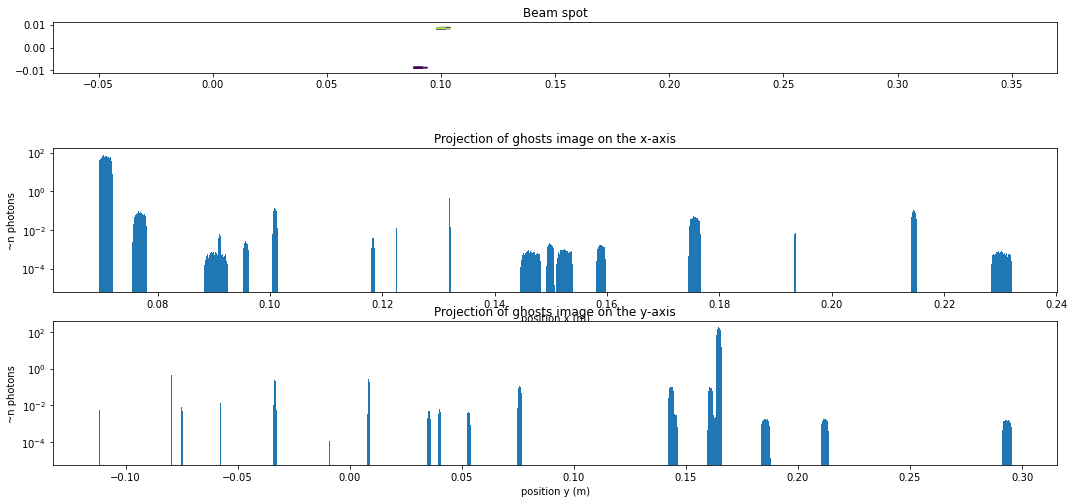

In [35]:
# Test beam - BEAM_CONFIG_3
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999060
new_beam['x_offset'] = -0.1
new_beam['y_offset'] = 0.25
new_beam['x_euler'] = 3
new_beam['y_euler'] = 6
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

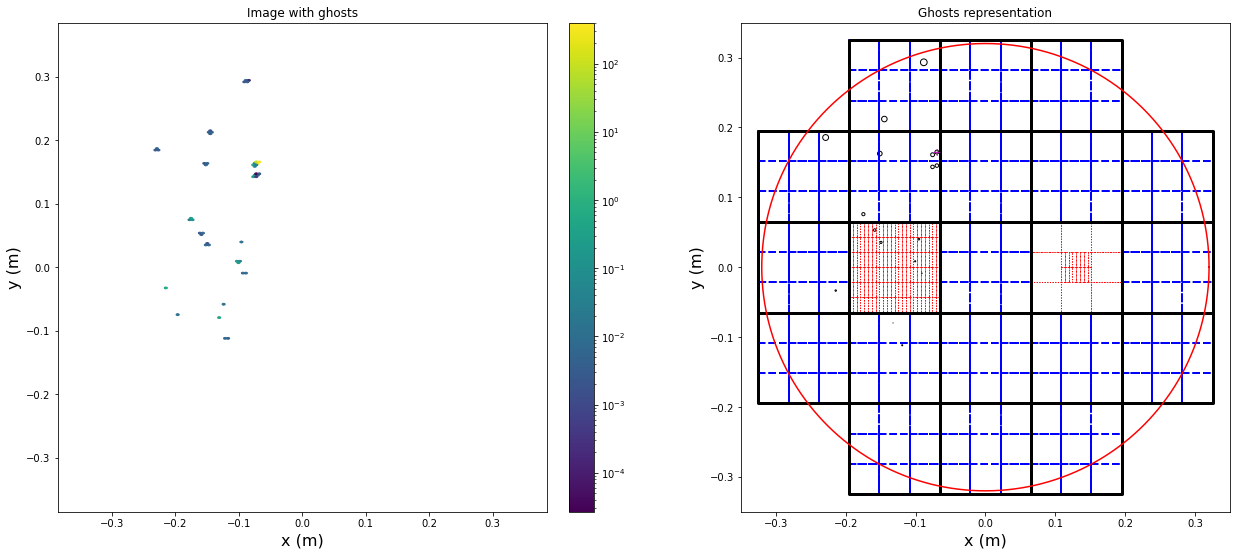

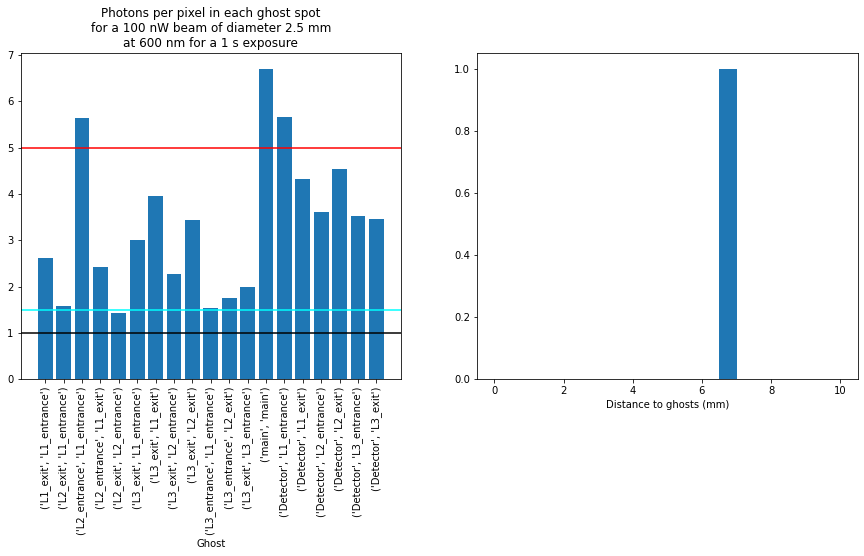

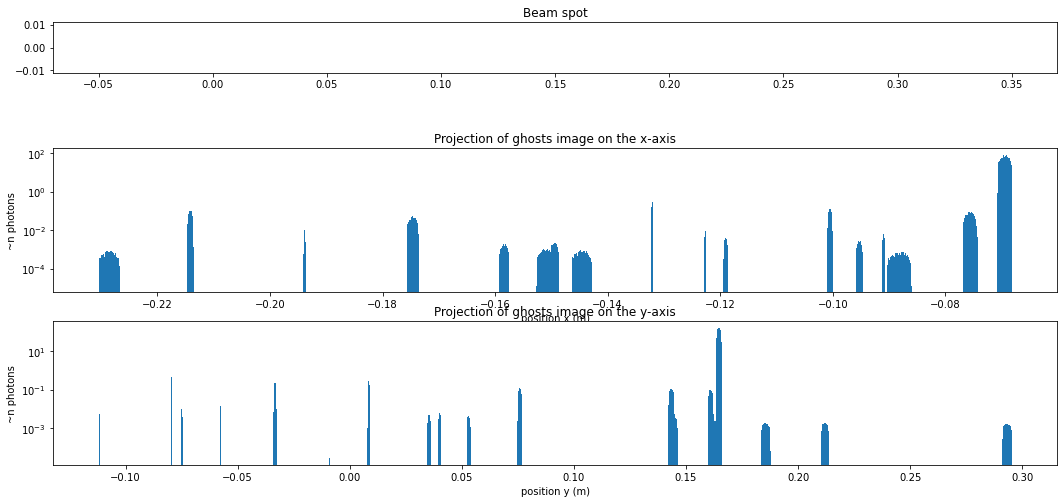

In [36]:
# Test beam - BEAM_CONFIG_3
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999061
new_beam['x_offset'] = 0.1
new_beam['y_offset'] = 0.25
new_beam['x_euler'] = 3
new_beam['y_euler'] = -6
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

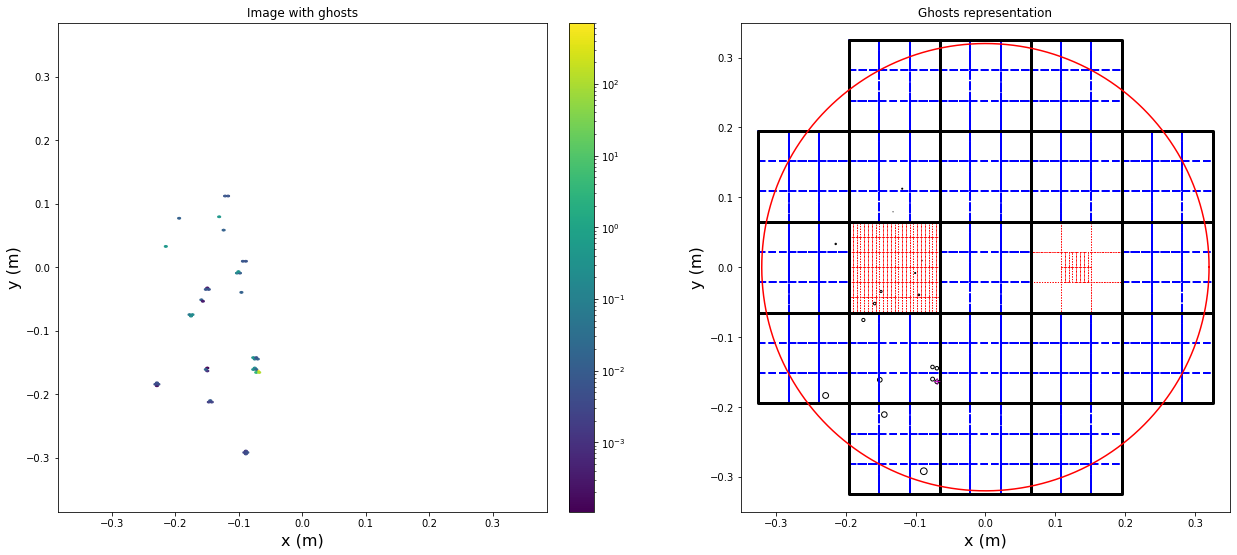

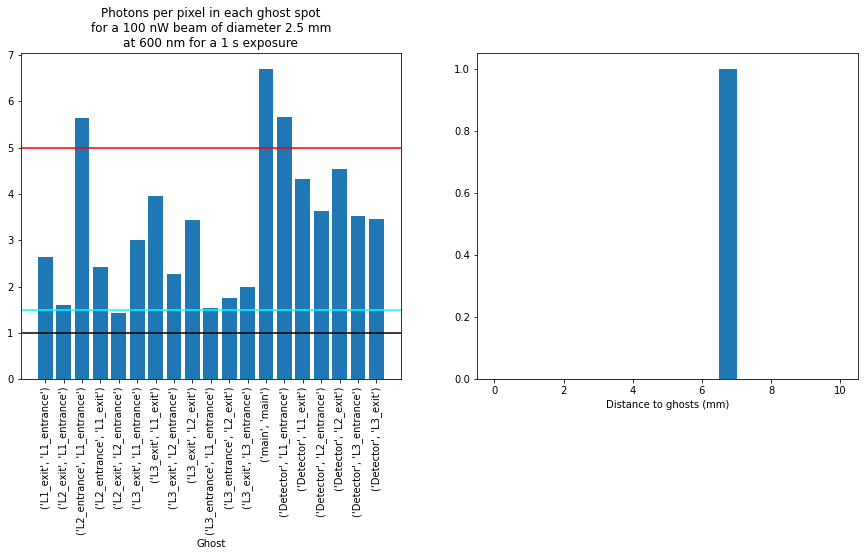

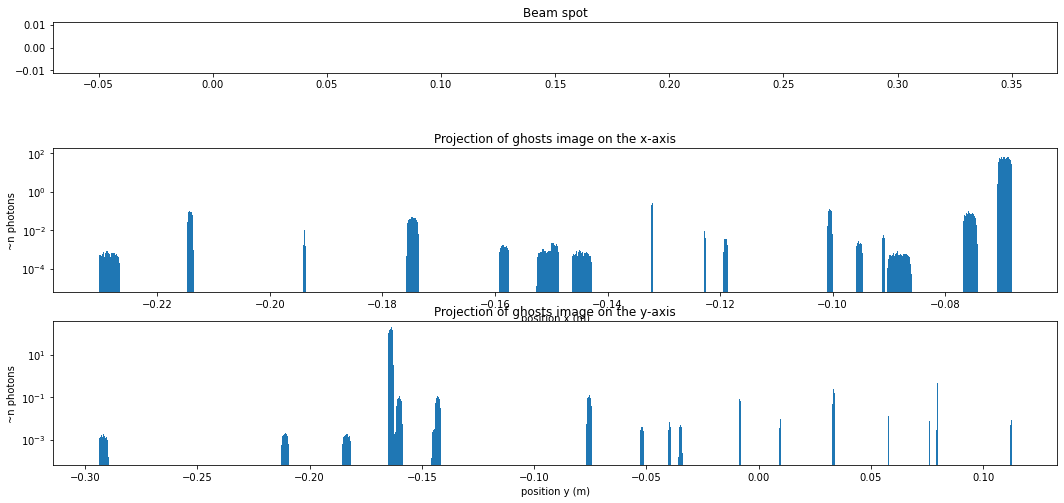

In [37]:
# Test beam - BEAM_CONFIG_3
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999062
new_beam['x_offset'] = 0.1
new_beam['y_offset'] = -0.25
new_beam['x_euler'] = -3
new_beam['y_euler'] = -6
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

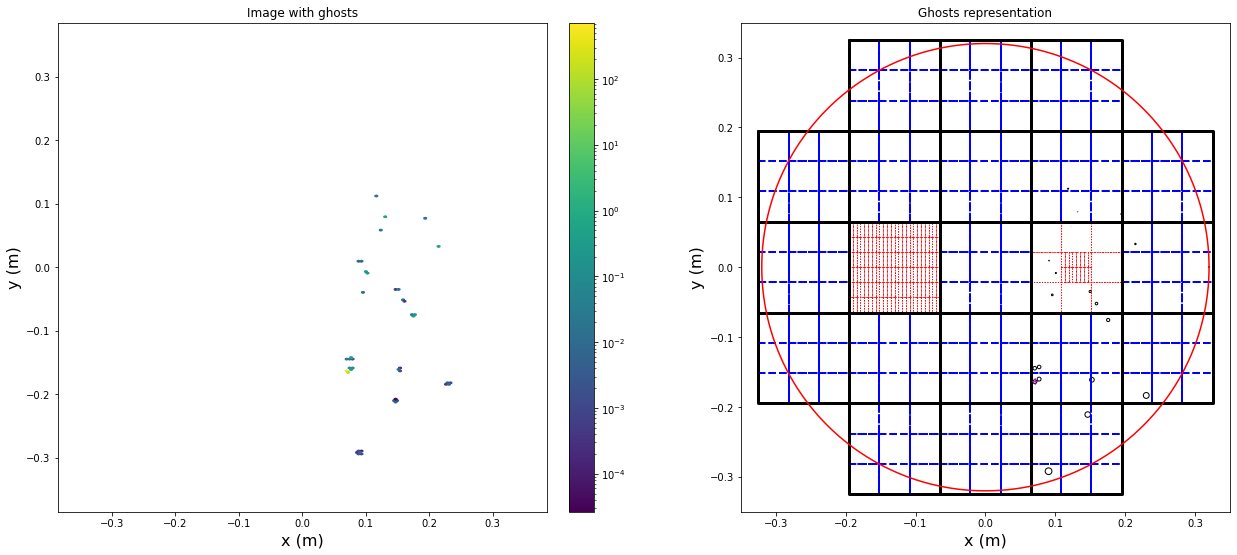

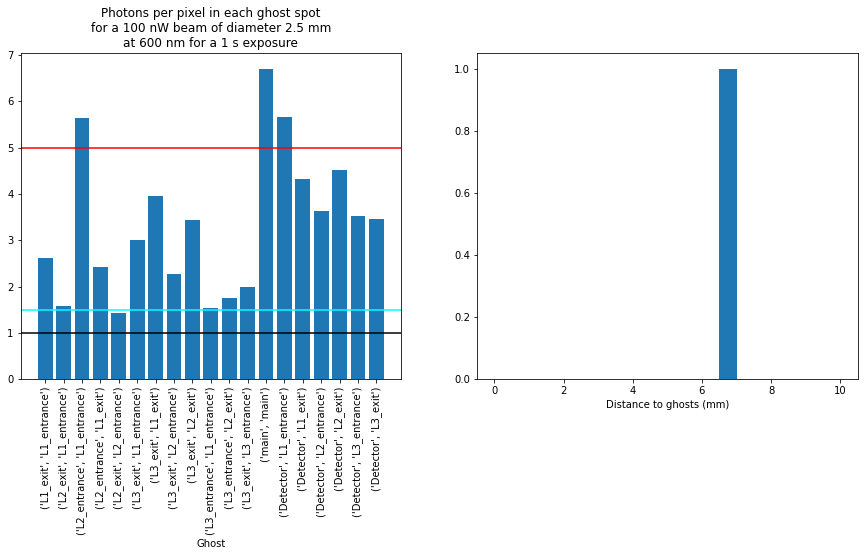

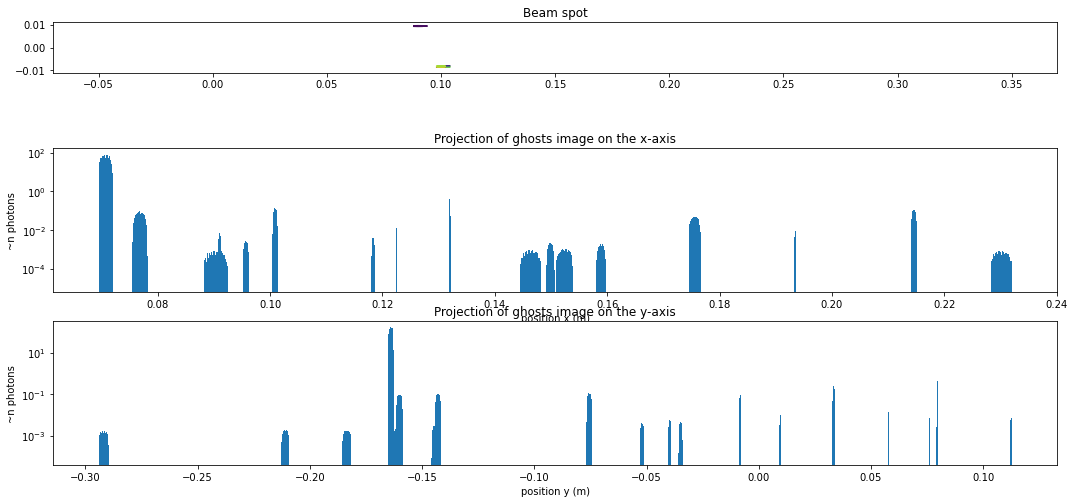

In [38]:
# Test beam - BEAM_CONFIG_3
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['beam_id'] = 999063
new_beam['x_offset'] = -0.1
new_beam['y_offset'] = -0.25
new_beam['x_euler'] = -3
new_beam['y_euler'] = +6
reference_beam_configurations.append(new_beam)
beam_test(telescope, new_beam)

## Add a bunch of configurations to map central CCDs from the beam axis 

In [39]:
# Mapping CCDs centers
from ghosts.constants import LSST_CAMERA_CCD_DX
ccds_x = np.arange(-2, 3) * LSST_CAMERA_CCD_DX * 1.5
ccds_y = np.arange(-2, 3) * LSST_CAMERA_CCD_DX * 1.5

def build_beams_to_central_ccds(base_id=999100):
    # point each beam config to the CCD centers
    beams = []
    bid = base_id
    for pos_x in ccds_x:
        for pos_y in ccds_y:
            new_config = beam.point_beam_to_target(BEAM_CONFIG_0, pos_x, pos_y)
            new_config['beam_id'] = bid
            beams.append(new_config)
            bid = bid + 1
    return beams

# build list of beam to ccd
beams = build_beams_to_central_ccds(base_id=999100)


<AxesSubplot: title={'center': 'Beam set impact points'}, xlabel='Camera X', ylabel='Camera Y'>

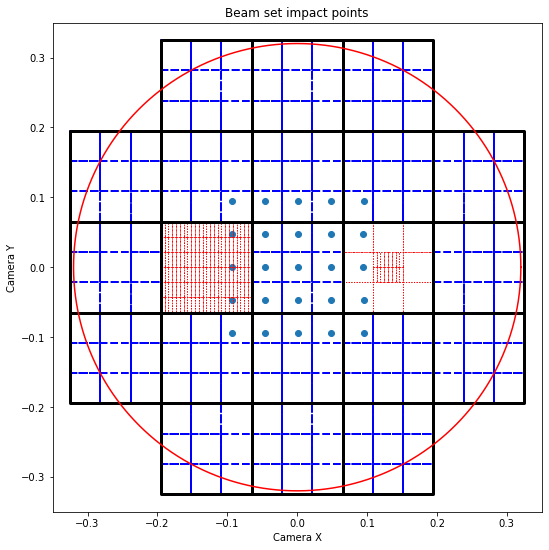

In [40]:
# verify beam spots for
patch_full_df = simulator.simulate_impact_points_for_beam_set(telescope, beams)
plotter.plot_impact_points_full_frame(patch_full_df)
camera = build_camera()
show_camera(plt.gca(), camera)

In [41]:
# add list to reference list
reference_beam_configurations.extend(beams)

## Visualize the full list of beam configurations

In [42]:
# make a nice panda data frame with beam configurations
beam_frame = beam.concat_dicts(reference_beam_configurations)
print(f'Number of configurations = {len(beam_frame)}')
beam_frame


Number of configurations = 57


beam_id            wl  n_photons   radius  x_offset  y_offset  \
999000   999000  5.000000e-07       1000  0.00125     0.100     0.000   
999001   999001  5.000000e-07       1000  0.00125    -0.100     0.000   
999002   999002  5.000000e-07       1000  0.00125     0.000     0.100   
999003   999003  5.000000e-07       1000  0.00125     0.000    -0.100   
999010   999010  5.000000e-07       1000  0.00125     0.100     0.000   
999011   999011  5.000000e-07       1000  0.00125     0.100     0.000   
999012   999012  5.000000e-07       1000  0.00125    -0.100     0.000   
999013   999013  5.000000e-07       1000  0.00125    -0.100     0.000   
999014   999014  5.000000e-07       1000  0.00125     0.000     0.100   
999015   999015  5.000000e-07       1000  0.00125     0.000     0.100   
999016   999016  5.000000e-07       1000  0.00125     0.000    -0.100   
999017   999017  5.000000e-07       1000  0.00125     0.000    -0.100   
999020   999020  5.000000e-07       1000  0.00125     0.100     0.100   
999021   999021  5.000000e-07       1000  0.00125    -0.100     0.100   
999022   999022  5.000000e-07       1000  0.00125    -0.100    -0.100   
999023   999023  5.000000e-07       1000  0.00125     0.100    -0.100   
999030   999030  5.000000e-07       1000  0.00125     0.075     0.075   
999031   999031  5.000000e-07       1000  0.00125    -0.075     0.075   
999032   999032  5.000000e-07       1000  0.00125    -0.075    -0.075   
999033   999033  5.000000e-07       1000  0.00125     0.075    -0.075   
999040   999040  5.000000e-07        100  0.00125    -0.300     0.550   
999041   999041  5.000000e-07        100  0.00125     0.300     0.550   
999042   999042  5.000000e-07        100  0.00125     0.300    -0.550   
999043   999043  5.000000e-07        100  0.00125    -0.300    -0.550   
999050   999050  5.000000e-07       1000  0.00125    -0.250     0.200   
999051   999051  5.000000e-07       1000  0.00125     0.250     0.200   
999052   999052  5.000000e-07       1000  0.00125     0.250    -0.200   
999053   999053  5.000000e-07       1000  0.00125    -0.250    -0.200   
999060   999060  5.000000e-07       1000  0.00125    -0.100     0.250   
999061   999061  5.000000e-07       1000  0.00125     0.100     0.250   
999062   999062  5.000000e-07       1000  0.00125     0.100    -0.250   
999063   999063  5.000000e-07       1000  0.00125    -0.100    -0.250   
999100   999100  5.000000e-07       1000  0.00125     0.000     0.000   
999101   999101  5.000000e-07       1000  0.00125     0.000     0.000   
999102   999102  5.000000e-07       1000  0.00125     0.000     0.000   
999103   999103  5.000000e-07       1000  0.00125     0.000     0.000   
999104   999104  5.000000e-07       1000  0.00125     0.000     0.000   
999105   999105  5.000000e-07       1000  0.00125     0.000     0.000   
999106   999106  5.000000e-07       1000  0.00125     0.000     0.000   
999107   999107  5.000000e-07       1000  0.00125     0.000     0.000   
999108   999108  5.000000e-07       1000  0.00125     0.000     0.000   
999109   999109  5.000000e-07       1000  0.00125     0.000     0.000   
999110   999110  5.000000e-07       1000  0.00125     0.000     0.000   
999111   999111  5.000000e-07       1000  0.00125     0.000     0.000   
999112   999112  5.000000e-07       1000  0.00125     0.000     0.000   
999113   999113  5.000000e-07       1000  0.00125     0.000     0.000   
999114   999114  5.000000e-07       1000  0.00125     0.000     0.000   
999115   999115  5.000000e-07       1000  0.00125     0.000     0.000   
999116   999116  5.000000e-07       1000  0.00125     0.000     0.000   
999117   999117  5.000000e-07       1000  0.00125     0.000     0.000   
999118   999118  5.000000e-07       1000  0.00125     0.000     0.000   
999119   999119  5.000000e-07       1000  0.00125     0.000     0.000   
999120   999120  5.000000e-07       1000  0.00125     0.000     0.000   
999121   999121  5.000000e-07       1000  0.00125     0.000     0.

In [43]:
beam_frame.to_markdown()

'|        |   beam_id |    wl |   n_photons |   radius |   x_offset |   y_offset |   z_offset |   z_euler |   y_euler |   x_euler |\n|-------:|----------:|------:|------------:|---------:|-----------:|-----------:|-----------:|----------:|----------:|----------:|\n| 999000 |    999000 | 5e-07 |        1000 |  0.00125 |      0.1   |      0     |    2.79747 |         0 |   0.5     |   0       |\n| 999001 |    999001 | 5e-07 |        1000 |  0.00125 |     -0.1   |      0     |    2.79747 |         0 |  -0.5     |   0       |\n| 999002 |    999002 | 5e-07 |        1000 |  0.00125 |      0     |      0.1   |    2.79747 |         0 |   0       |  -0.5     |\n| 999003 |    999003 | 5e-07 |        1000 |  0.00125 |      0     |     -0.1   |    2.79747 |         0 |   0       |   0.5     |\n| 999010 |    999010 | 5e-07 |        1000 |  0.00125 |      0.1   |      0     |    2.79747 |         0 |   0       |   1       |\n| 999011 |    999011 | 5e-07 |        1000 |  0.00125 |      0.1   |      0

In [44]:
#pd.DataFrame._repr_latex_ = _repr_latex_

# Try to visualize beam configurations and ghosts

In [45]:
# Try to visualize beam configuration and ghosts
from ghosts.tools import get_main_impact_point

def simulate_ghost_config(telescope, beam_config, ax=None):
    # Run simulation with standard beam config
    trace_full, r_forward, r_reverse, rays = simulator.run_simulation(telescope, beam_config=beam_config)
    simulation = [trace_full, r_forward, r_reverse, rays]

    # reduce ghosts
    spots_data, _spots = reduce_ghosts(r_forward)
    spots_data_frame = make_data_frame(spots_data)
    
    # visualize ghosts
    if ax is None:
        fig, ax = plt.subplots(1, 1)

    spot_size_scaling = 10
    spots_x = spots_data_frame['pos_x']
    spots_y = spots_data_frame['pos_y']
    spots_size = ((spots_data_frame['radius'] * 1000) ** 2) * spot_size_scaling
    ax.scatter(spots_x, spots_y, s=spots_size, facecolors='none', edgecolors='black')
    ax.set_xlim((-0.35, 0.35))
    ax.set_ylim((-0.35, 0.35))
    ax.set_aspect("equal")
    ax.set_xlabel('x (m)', fontsize=16)
    ax.set_ylabel('y (m)', fontsize=16)
    
    # Plot direct path location on focal plane
    _, direct_x, direct_y, _ = get_main_impact_point(r_forward)
    ax.text(direct_x, direct_y, '+', horizontalalignment='center',
            verticalalignment='center', color='m', fontsize=20)

    # add camera
    camera = build_camera()
    show_camera(ax, camera)
    
    # add config
    dy = 0.02
    #ax.text(-0.34, 0.32, f'beam_id = {beam_config["beam_id"]:0d}', color='black')
    #ax.text(-0.34, 0.32-dy, f'x_offset = {beam_config["x_offset"]:.3f}', color='black')
    #ax.text(-0.34, 0.32-2*dy, f'y_offset = {beam_config["y_offset"]:.3f}', color='black')
    #ax.text(-0.34, 0.32-3*dy, f'x_euler = {beam_config["x_euler"]:.3f}', color='black')
    #ax.text(-0.34, 0.32-4*dy, f'y_euler = {beam_config["y_euler"]:.3f}', color='black')
    ax.set_title(f'beam_id = {beam_config["beam_id"]:0d}')
    
    # return figure and 
    return ax


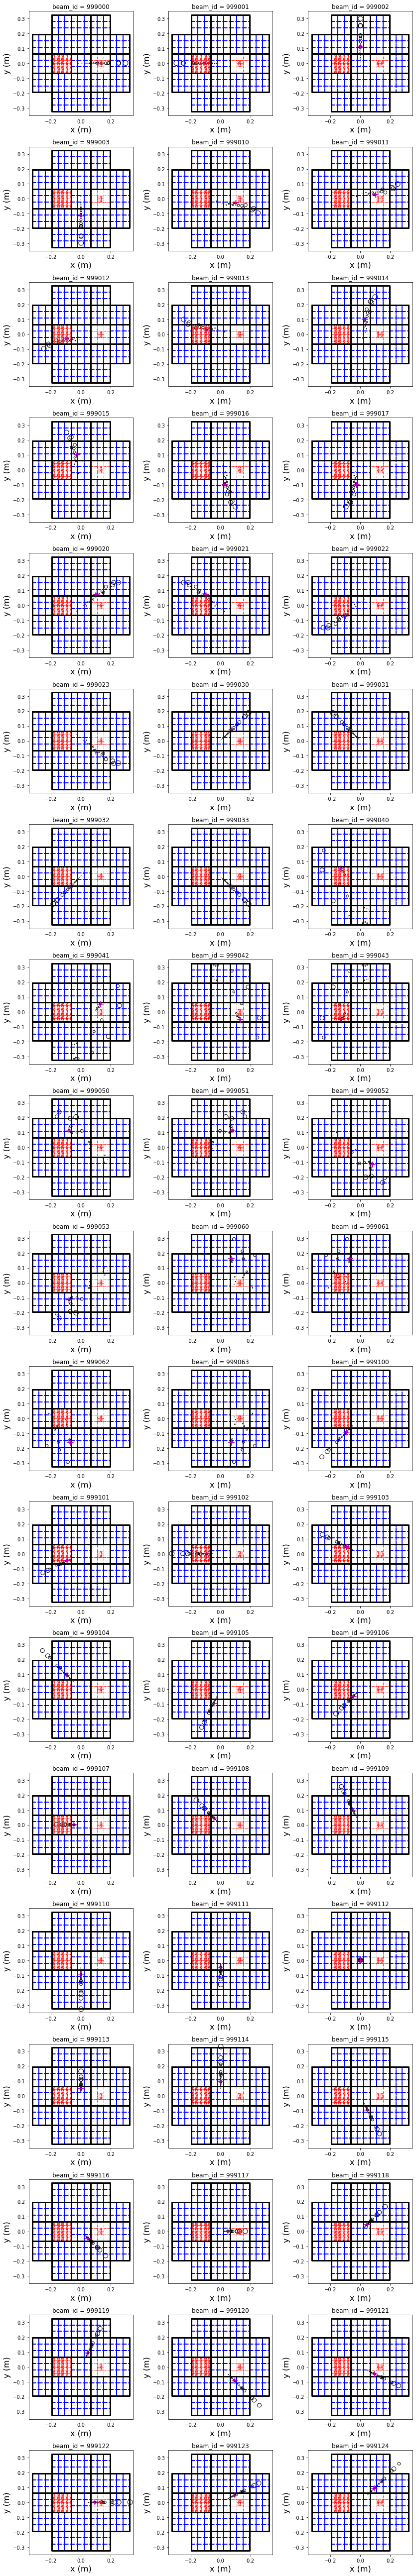

In [46]:
plt.rcParams["figure.figsize"] = [12, 72]
fig, ax = plt.subplots(19, 3)
axs = ax.flatten()
for i, id in enumerate(list(beam_frame['beam_id'])):
    conf = beam.to_dict((beam_frame[beam_frame['beam_id']==id]))
    simulate_ghost_config(telescope, conf, ax=axs[i])
plt.tight_layout()

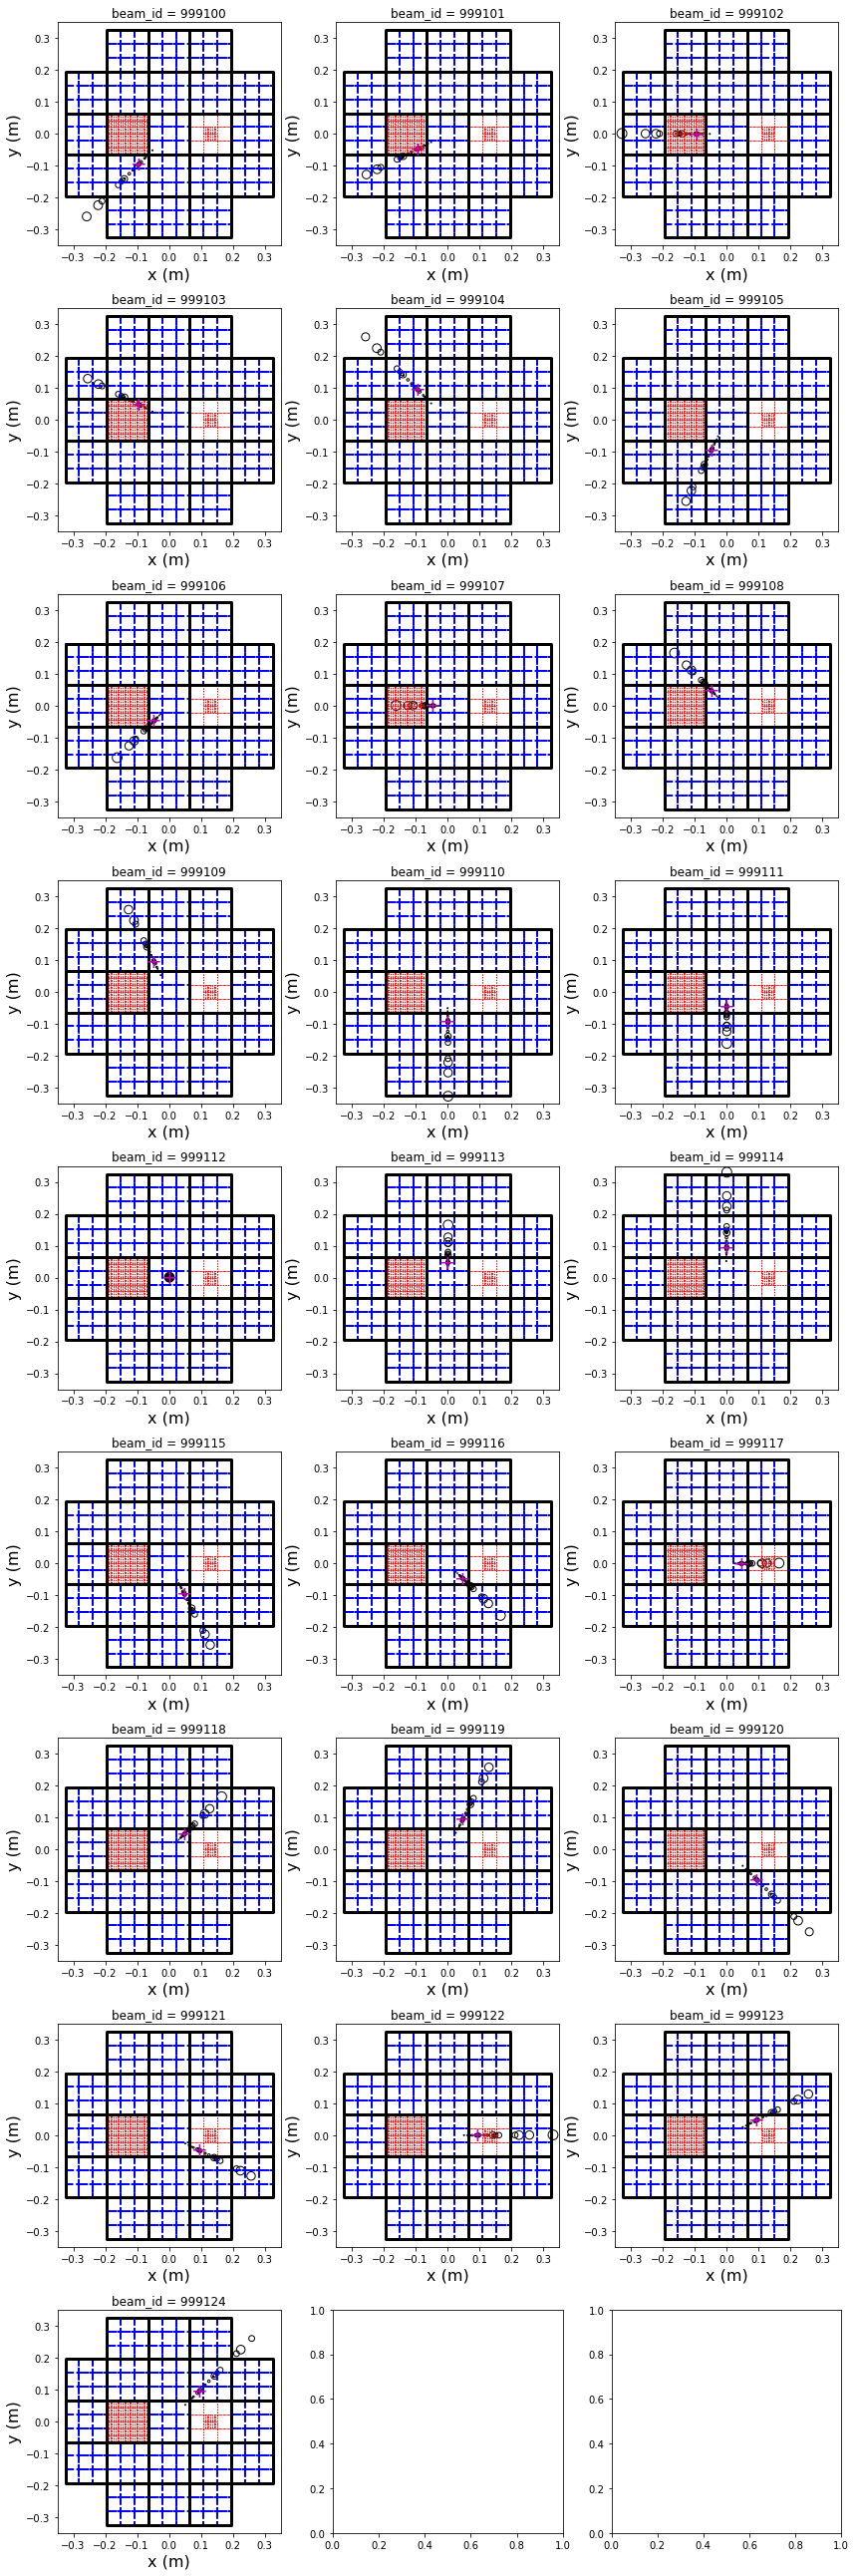

In [47]:
plt.rcParams["figure.figsize"] = [12, 36]
fig, ax = plt.subplots(9, 3)
axs = ax.flatten()
for i, one in enumerate(beams):
    simulate_ghost_config(telescope, one, ax=axs[i])
plt.tight_layout()
